<a href="https://colab.research.google.com/github/jb8794/NLP_ENSAE/blob/master/Final_Yelp_prediction_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I) Data exploration and processing**

This notebooks uses GPU computing.
It uses three datasets, two from Yelp (as specified in the project instructions from the class) and one custom-made (available on the repo for the project).

The yelp datasets are available on our google drive and the notebook will try to download them from there. However, due to the usage limits of Google drive, it is possible that one file is unavailable.
In this case, please use your own copy of the Yelp dataset file or download it manually using the links provided below.

Importing necessary packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Downloading data sets

In [0]:
import gdown

# Download business.json (approx 130 MB) (Yelp Dataset)
url = "https://drive.google.com/uc?id=1cWVqBv21eJGwv0YkGGwItDRaZncgerB2"
output = "business.json"
gdown.download(url, output, quiet=False)

# In case of problems, you can download business.json manually from our Drive
# https://drive.google.com/open?id=1cWVqBv21eJGwv0YkGGwItDRaZncgerB2

Downloading...
From: https://drive.google.com/uc?id=1cWVqBv21eJGwv0YkGGwItDRaZncgerB2
To: /content/business.json
138MB [00:00, 249MB/s]


'business.json'

In [0]:
# Download and review.json (approx 5 GB) (Yelp Dataset)

# In case of problems, download review.json manually from our Drive
# https://drive.google.com/open?id=1tFe5fWOItKrhQsCJ6RpffOUhS_L-k5DP

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1HUjAK8Ge-N6Vtp_hSZ6SaVbT2_BZymlV' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1HUjAK8Ge-N6Vtp_hSZ6SaVbT2_BZymlV" -O review.json && rm -rf /tmp/cookies.txt

# If the first wget does not work, try to wget this mirror :
# https://drive.google.com/open?id=1HUjAK8Ge-N6Vtp_hSZ6SaVbT2_BZymlV
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tFe5fWOItKrhQsCJ6RpffOUhS_L-k5DP' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tFe5fWOItKrhQsCJ6RpffOUhS_L-k5DP" -O review.json && rm -rf /tmp/cookies.txt

--2020-04-12 10:50:05--  https://docs.google.com/uc?export=download&confirm=Z8pr&id=1HUjAK8Ge-N6Vtp_hSZ6SaVbT2_BZymlV
Resolving docs.google.com (docs.google.com)... 173.194.217.139, 173.194.217.100, 173.194.217.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-ak-docs.googleusercontent.com/docs/securesc/cn96f9a46g9kg929ik5m8c1tanspqb7m/97ve9k0aq2nhmmhco7v4li2ks5rnlpna/1586688600000/06994782529465281296/01874733135856199576Z/1HUjAK8Ge-N6Vtp_hSZ6SaVbT2_BZymlV?e=download [following]
--2020-04-12 10:50:05--  https://doc-04-ak-docs.googleusercontent.com/docs/securesc/cn96f9a46g9kg929ik5m8c1tanspqb7m/97ve9k0aq2nhmmhco7v4li2ks5rnlpna/1586688600000/06994782529465281296/01874733135856199576Z/1HUjAK8Ge-N6Vtp_hSZ6SaVbT2_BZymlV?e=download
Resolving doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Conne

In [0]:
# Download USPostocodeRevenue.xlsx (approx 1 MB)
url = "https://drive.google.com/uc?id=1d5Cu1UE8O-rGwaQ5HhOAWyRTyZtclrtx"
output = "USPostocodeRevenue.xlsx"
gdown.download(url, output, quiet=False)

# In case of problems, you can download review.json manually from our Drive
# https://drive.google.com/open?id=1d5Cu1UE8O-rGwaQ5HhOAWyRTyZtclrtx
# or from the github repo for the project

Downloading...
From: https://drive.google.com/uc?id=1d5Cu1UE8O-rGwaQ5HhOAWyRTyZtclrtx
To: /content/USPostocodeRevenue.xlsx
100%|██████████| 1.19M/1.19M [00:00<00:00, 99.4MB/s]


'USPostocodeRevenue.xlsx'

## I.A) Exploring data on businesses

In [0]:
df_business = pd.read_json('/content/business.json', lines=True)

In [0]:
len(df_business.index)

192609

In [0]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


Selecting the restaurants

In [0]:
df_restaurants = df_business[df_business['categories'].str.contains('Restaurants',case=False, na=False)]

In [0]:
len(df_restaurants.index)

59371

Duplicating lines for each word in "categories" ("exploding" categories), since one restaurant may belong to several categories

In [0]:
df_restaurants_exploded = df_restaurants.assign(categories = df_restaurants.categories.str.split(', ')).explode('categories')

In [0]:
df_restaurants_exploded.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...",Specialty Food,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...",Restaurants,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...",Dim Sum,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...",Imported Food,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...",Food,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."


Exploring categories related to restaurants. In the rest of the project, we will keep the four biggest categories (in terms of "national types") : American (traditional), Italian, Mexican and Chinese

In [0]:
print(df_restaurants_exploded.categories.value_counts().to_string())

Restaurants                         59371
Food                                14800
Nightlife                            8562
Bars                                 8182
Sandwiches                           7332
Fast Food                            7257
American (Traditional)               7107
Pizza                                6804
Burgers                              5404
Breakfast & Brunch                   5381
American (New)                       4882
Italian                              4716
Mexican                              4618
Chinese                              4428
Coffee & Tea                         3647
Cafes                                3232
Japanese                             2716
Chicken Wings                        2705
Event Planning & Services            2685
Salad                                2531
Seafood                              2508
Sushi Bars                           2258
Specialty Food                       2091
Delis                             

Keeping only the categories we selected in *df_restaurants*

In [0]:
df_restaurants=df_restaurants_exploded[(df_restaurants_exploded['categories']=='American (Traditional)') | (df_restaurants_exploded['categories']=='Italian') | (df_restaurants_exploded['categories']=='Mexican') | (df_restaurants_exploded['categories']=='Chinese')]

Exploring geographical (states) categories. In the rest of the study we will only keep the five US states where there is the highest number of restaurants in the dataset : AZ (Arizona), NV (Nevada), NC (North Carolina), OH (Ohio), PA (Pennsylvania) (no Canadian state like ON Ontario)

In [0]:
print(df_business.state.value_counts().to_string())

AZ     56686
NV     36312
ON     33412
NC     14720
OH     14697
PA     11216
QC      9219
AB      8012
WI      5154
IL      1932
SC      1162
NY        22
CA        19
TX         6
FL         4
XGM        4
AL         3
CT         3
WA         3
NE         2
VT         2
VA         2
AK         2
XWY        2
GA         2
CON        1
DOW        1
NJ         1
BAS        1
UT         1
AR         1
XGL        1
NM         1
BC         1
TN         1
DUR        1


## I.B) Opening data on users reviews

Because of the very large size of the reviews.json file, we cannot use the read_json function of pandas : it exceeds the RAM available on Google Colab. Instead, we use a function which opens the json line by line.

In [0]:
import json

def init_ds(json):
    ds= {}
    keys = json.keys()
    for k in keys:
        ds[k]= []
    return ds, keys

def read_json(file):
    dataset = {}
    keys = []
    with open(file) as file_lines:
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count ==0:
                dataset, keys = init_ds(data)
            for k in keys:
                dataset[k].append(data[k])
                
        return pd.DataFrame(dataset)

In [0]:
df_reviews = read_json('/content/review.json')

In [0]:
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [0]:
len(df_reviews.index)

6685900

We merge the reviews with the restaurant data we opened in I.A). We merge on business_id.

In [0]:
df_reviews=pd.merge(left=df_reviews,right=df_restaurants, how='left', left_on='business_id', right_on='business_id')

We drop all the reviews lines for which we have NaNs : this corresponds to the restaurants types we did not select in I.A).

In [0]:
df_reviews=df_reviews.dropna()

In [0]:
df_reviews.head()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
5,fdiNeiN_hoCxCMy2wTRW9g,w31MKYsNFMrjhWxxAb5wIw,eU_713ec6fTGNO4BegRaww,4.0,0,0,0,I'll be the first to admit that I was not exci...,2013-01-20 13:25:59,La Tavola Italiana,1 Boggs Ave,Pittsburgh,PA,15211,40.426779,-80.005652,3.5,132.0,1.0,"{'Ambience': '{'touristy': False, 'hipster': F...",Italian,"{'Tuesday': '16:0-22:0', 'Wednesday': '16:0-22..."
6,G7XHMxG0bx9oBJNECG4IFg,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,5,4,5,Tracy dessert had a big name in Hong Kong and ...,2016-05-07 01:21:02,Tracy Dessert,"3235 Highway 7 E, Unit 29",Markham,ON,L3R 3P9,43.848936,-79.347801,3.5,122.0,1.0,"{'RestaurantsGoodForGroups': 'True', 'Restaura...",Chinese,"{'Monday': '14:0-0:0', 'Tuesday': '14:0-0:0', ..."
12,Z7wgXp98wYB57QdRY3HQ3w,GYNnVehQeXjty0xH7-6Fhw,FxLfqxdYPA6Z85PFKaqLrg,4.0,0,0,0,Wow. So surprised at the one and two star revi...,2016-05-07 01:36:53,Pazzo,1614 Washington Rd,Pittsburgh,PA,15241,40.352618,-80.051070,2.0,32.0,0.0,"{'WiFi': 'u'free'', 'Alcohol': 'u'full_bar'', ...",Italian,"{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
15,svK3nBU7Rk8VfGorlrN52A,NJlxGtouq06hhC7sS2ECYw,YvrylyuWgbP90RgMqZQVnQ,5.0,0,0,0,You can't really find anything wrong with this...,2017-04-07 21:27:49,Jz's Pizza,232 Wellington Street W,Toronto,ON,M5V 3W1,43.645277,-79.389704,4.0,71.0,1.0,"{'NoiseLevel': 'u'quiet'', 'GoodForKids': 'Tru...",Italian,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
17,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3.0,1,7,1,I love chinese food and I love mexican food. W...,2015-04-01 16:30:00,Chino Bandido,"15414 N 19th Ave, Ste K",Phoenix,AZ,85023,33.626831,-112.100300,4.0,1600.0,1.0,"{'RestaurantsDelivery': 'False', 'RestaurantsT...",Mexican,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


## I.C) Opening data on revenue (from fiscal administration)

In [0]:
household_revenue=pd.read_excel('/content/USPostocodeRevenue.xlsx', header=1)

In [0]:
household_revenue.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,ARIZONA,Total,2977320.0,1368890.0,1090040.0,478170.0
2,ARIZONA,"$1 under $25,000",1038460.0,681090.0,141210.0,205240.0
3,ARIZONA,"$25,000 under $50,000",775840.0,388600.0,193940.0,179410.0
4,ARIZONA,"$50,000 under $75,000",410210.0,162320.0,186090.0,54590.0


Rearranging the table extracted from excel : we get a table where each rows corresponds to a postcode area, each column corresponds to the number of households in a given revenue bracket : from 0 to 25000 dollars , 25000 to 50000 dollars ...

In [0]:
postcode_revenue = pd.DataFrame(columns=['ZipCode','number_taxpayers_postcode', '1_to_25000', '25000_to_50000','50000_to_75000','75000_to_100000','100000_to_200000','200000_and_more'])
for i in range(int((len(household_revenue.index)-1)/8)):
  postcode_revenue=postcode_revenue.append({'ZipCode': household_revenue.iloc[(1+8*i),0],'number_taxpayers_postcode': household_revenue.iloc[(1+8*i),2], '1_to_25000': household_revenue.iloc[(2+8*i),2], '25000_to_50000': household_revenue.iloc[(3+8*i),2], '50000_to_75000': household_revenue.iloc[(4+8*i),2],'75000_to_100000': household_revenue.iloc[(5+8*i),2],'100000_to_200000': household_revenue.iloc[(6+8*i),2],'200000_and_more':household_revenue.iloc[(7+8*i),2] }, ignore_index=True)

Converting the table values to type *float* to compute new features.

In [0]:
postcode_revenue['number_taxpayers_postcode']=postcode_revenue['number_taxpayers_postcode'].astype(float)
postcode_revenue['1_to_25000']=postcode_revenue['1_to_25000'].astype(float)
postcode_revenue['25000_to_50000']=postcode_revenue['25000_to_50000'].astype(float)
postcode_revenue['50000_to_75000']=postcode_revenue['50000_to_75000'].astype(float)
postcode_revenue['75000_to_100000']=postcode_revenue['75000_to_100000'].astype(float)
postcode_revenue['100000_to_200000']=postcode_revenue['100000_to_200000'].astype(float)
postcode_revenue['200000_and_more']=postcode_revenue['200000_and_more'].astype(float)

We compute the three following features:

*   postcode_average_revenue : average revenue per postcode area (taking for each bracket the center of the bracket, e.g. 12500 for [0,25000])
*   proportion_low_revenue : proportion of households earning less than 25000 dollar per year in a postcode area
*   proportion_high_revenue : proportion of households earning more than 200000 dollar per year in a postcode area


In [0]:
postcode_revenue['postcode_average_revenue']=(postcode_revenue['1_to_25000']*12500+postcode_revenue['25000_to_50000']*37500+postcode_revenue['50000_to_75000']*62500+postcode_revenue['75000_to_100000']*87500+postcode_revenue['100000_to_200000']*150000+postcode_revenue['200000_and_more']*400000)/(postcode_revenue['number_taxpayers_postcode'])
postcode_revenue['proportion_low_revenue']=100*postcode_revenue['1_to_25000']/postcode_revenue['number_taxpayers_postcode']
postcode_revenue['proportion_high_revenue']=100*(postcode_revenue['200000_and_more'])/postcode_revenue['number_taxpayers_postcode']

In [0]:
postcode_revenue.head()

,ZipCode,number_taxpayers_postcode,1_to_25000,25000_to_50000,50000_to_75000,75000_to_100000,100000_to_200000,200000_and_more,postcode_average_revenue,proportion_low_revenue,proportion_high_revenue
0,ARIZONA,2977320.0,1038460.0,775840.0,410210.0,260590.0,367950.0,124270.0,65634.530383,34.879019,4.173888
1,85003,4030.0,1250.0,990.0,540.0,340.0,580.0,330.0,83188.585608,31.017370,8.188586
2,85004,3420.0,1030.0,900.0,520.0,300.0,450.0,220.0,76279.239766,30.116959,6.432749
3,85006,9660.0,4410.0,3070.0,1170.0,470.0,460.0,80.0,39906.832298,45.652174,0.828157
4,85007,5440.0,2510.0,1510.0,510.0,280.0,400.0,230.0,54480.698529,46.139706,4.227941


In [0]:
postcode_revenue=postcode_revenue.drop(['1_to_25000','25000_to_50000','50000_to_75000','75000_to_100000','100000_to_200000','200000_and_more'],axis=1)

In [0]:
postcode_revenue.tail()

,ZipCode,number_taxpayers_postcode,postcode_average_revenue,proportion_low_revenue,proportion_high_revenue
3505,19607,11790.0,62171.331637,31.552163,2.714165
3506,19608,11920.0,86419.882550,29.110738,7.046980
3507,19609,5420.0,59547.970480,31.365314,1.660517
3508,19610,8110.0,101926.633785,26.633785,11.344020
3509,19611,4900.0,43061.224490,42.040816,1.020408


## I.D) Merging databases

Selecting reviews in the five US States we chose : Arizona, Nevada, North Carolina, Ohio, Pennsylvania

In [0]:
df_reviews['state']=df_reviews['state'].astype(str)
df_reviews=df_reviews[(df_reviews['state']=='AZ') | (df_reviews['state']=='NV') | (df_reviews['state']=='NC') | (df_reviews['state']=='OH') | (df_reviews['state']=='PA')]

Getting rid of lines with weird postcode values in the reviews database : a restaurant located in Ohio has a canadian type postcode! (M8Z 1N1)

In [0]:
df_reviews=df_reviews[df_reviews['postal_code']!='M8Z 1N1']
df_reviews=df_reviews[df_reviews['postal_code']!='']

Getting rid of some rows in the postcode database (they correspond to whole states instead of postcode areas)

In [0]:
for u in ['ARIZONA','NEVADA','NORTH CAROLINA','OHIO','PENNSYLVANIA']:
  postcode_revenue=postcode_revenue[postcode_revenue['ZipCode']!=u]

Converting postcode columns from *df_reviews* and *postcode_revenue* to same type to prepare for merge.

In [0]:
df_reviews['postal_code']=df_reviews['postal_code'].astype(int)
postcode_revenue['ZipCode']=postcode_revenue['ZipCode'].astype(int)

Merging reviews with postcode review data

In [0]:
df=pd.merge(left=df_reviews,right=postcode_revenue, how='left', left_on='postal_code', right_on='ZipCode')

In [0]:
len(df.index)

1443571

We drop reviews appearing on more than one row : this means that they correspond to restaurants belonging to different categories at the same time (for example, restaurants serving both mexican and chinese food).

In [0]:
df=df.drop_duplicates(subset=['review_id'], keep=False)

In [0]:
len(df.index)

1318654

Dropping columns we won't use

In [0]:
df=df.drop(['latitude','longitude','ZipCode','useful','funny','cool','stars_y','hours'], axis=1)

Defining categorical variables for ratings and social parameters (here, 'stars_x' are the rating given by the reviewers and 'stars-y' are the average rating of the restaurant)

In [0]:
df['stars_x']=df['stars_x'].astype(str)
df.loc[(df['stars_x']=='3.0')| (df['stars_x']=='4.0'),'rating']='good'
df.loc[df['stars_x']=='5.0','rating']='excellent'
df.loc[(df['stars_x']=='2.0') |(df['stars_x']=='1.0'),'rating']='bad'

In [0]:
df=df[((df['proportion_high_revenue']>15) & (df['proportion_low_revenue']>35))==False]
df.loc[:,'social']='average'
df.loc[df['proportion_high_revenue']>15,'social']='rich'
df.loc[df['proportion_low_revenue']>30,'social']='poor'

Pie chart for each variable to be predicted

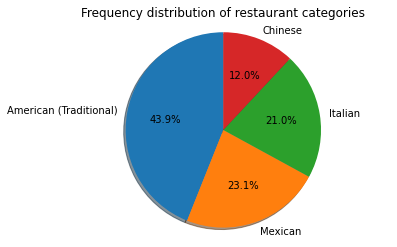

In [0]:
categories_count = df['categories'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(categories_count.values, labels=categories_count.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Frequency distribution of restaurant categories')
plt.show()

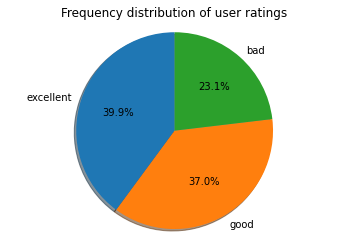

In [0]:
ratings_count = df['rating'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(ratings_count.values, labels=ratings_count.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Frequency distribution of user ratings')
plt.show()

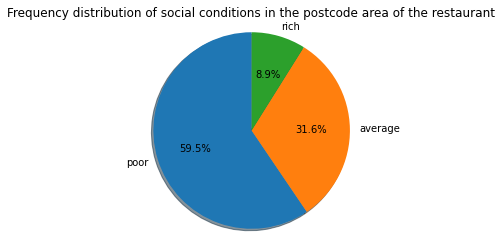

In [0]:
social_count = df['social'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(social_count.values, labels=social_count.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Frequency distribution of social conditions in the postcode area of the restaurant')
plt.show()

Defining a column combining all three categorical variables (i.e. giving the three classes of each variable in one string)

In [0]:
df['combined']=df['categories']+'_'+df['rating']+'_'+df['social']

In [0]:
df.head()

,review_id,user_id,business_id,stars_x,text,date,name,address,city,state,postal_code,review_count,is_open,attributes,categories,number_taxpayers_postcode,postcode_average_revenue,proportion_low_revenue,proportion_high_revenue,rating,social,combined
0,fdiNeiN_hoCxCMy2wTRW9g,w31MKYsNFMrjhWxxAb5wIw,eU_713ec6fTGNO4BegRaww,4.0,I'll be the first to admit that I was not exci...,2013-01-20 13:25:59,La Tavola Italiana,1 Boggs Ave,Pittsburgh,PA,15211,132.0,1.0,"{'Ambience': '{'touristy': False, 'hipster': F...",Italian,6340.0,61632.492114,30.126183,3.470032,good,poor,Italian_good_poor
1,Z7wgXp98wYB57QdRY3HQ3w,GYNnVehQeXjty0xH7-6Fhw,FxLfqxdYPA6Z85PFKaqLrg,4.0,Wow. So surprised at the one and two star revi...,2016-05-07 01:36:53,Pazzo,1614 Washington Rd,Pittsburgh,PA,15241,32.0,0.0,"{'WiFi': 'u'free'', 'Alcohol': 'u'full_bar'', ...",Italian,10580.0,137370.037807,25.425331,19.754253,good,rich,Italian_good_rich
4,Amo5gZBvCuPc_tZNpHwtsA,DzZ7piLBF-WsJxqosfJgtA,qx6WhZ42eDKmBchZDax4dQ,5.0,"Our family LOVES the food here. Quick, friendl...",2017-03-27 01:14:37,Casanova Brothers Pizza,959 N Val Vista Dr,Gilbert,AZ,85234,943.0,1.0,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...",Italian,22250.0,83640.449438,28.359551,6.157303,excellent,average,Italian_excellent_average
5,S337tATeouQJdoPYyir29w,2mxBNBeFrgDszqGS5tdEHA,d_L-rfS1vT3JMzgCUGtiow,5.0,Pick any meat on the planet and the chef will ...,2016-07-25 03:57:19,Border Grill,3950 S Las Vegas Blvd,Las Vegas,NV,89119,1623.0,1.0,"{'WiFi': 'u'free'', 'RestaurantsTakeOut': 'Tru...",Mexican,21470.0,35735.910573,49.464369,0.838379,excellent,poor,Mexican_excellent_poor
6,qm97yMwREr7BKkexlwLFbg,TTRVdTXKcq-xn6-1IWbwEw,Gyrez6K8f1AyR7dzW9fvAw,5.0,their pettuccine was fresh-made in the morning...,2013-12-28 22:28:08,Casanova,"3377 S Las Vegas Blvd, Ste 2170",Las Vegas,NV,89109,495.0,1.0,"{'HasTV': 'True', 'Ambience': '{'romantic': Fa...",Italian,3460.0,95881.502890,37.283237,13.872832,excellent,poor,Italian_excellent_poor


Saving our database (pickle format more convenient)

In [0]:
save_url = "/content/yelp_data_09042020.pkl"
df.to_pickle(save_url)

# **II) Prediction of characteristics based on user's reviews**

##II.A) Predictions with SVMs ans random forests

### II.A.1) Preparation of dataset

Opening files and importing necessary packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_pickle('/content/yelp_data_09042020.pkl')

After shuffing the rows, we extract two sub-datasets : one to build prediction functions (*df_sample*), another one to train a word vectorization with Word2Vec. Their size is chosen in accordance with RAM limitations. 


In [0]:
df_shuffled=df.sample(frac=1,random_state=1)
df_sample=df_shuffled.head(25000)
df_train_voc=df_shuffled.tail(150000)

We plot histograms of distribution of each variable to be predicted to check that they have same distribution in the sample and in the main file.

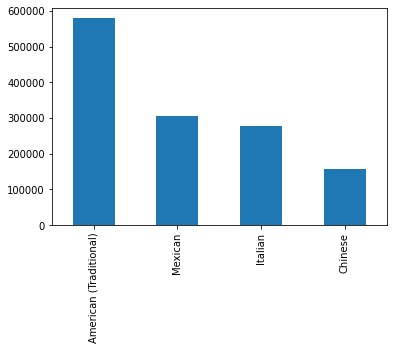

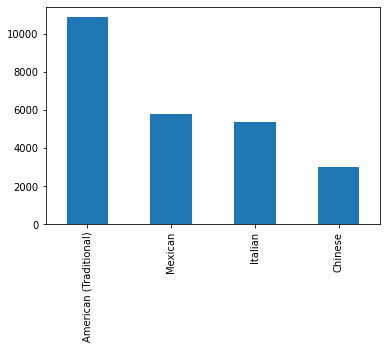

In [0]:
pd.Series(df.loc[:,'categories']).value_counts().plot(kind='bar')
plt.show()
pd.Series(df_sample.loc[:,'categories']).value_counts().plot(kind='bar')

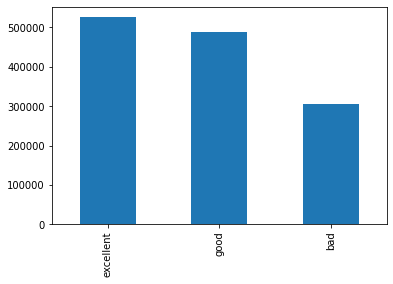

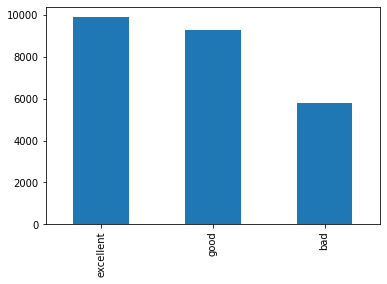

In [0]:
pd.Series(df.loc[:,'rating']).value_counts().plot(kind='bar')
plt.show()
pd.Series(df_sample.loc[:,'rating']).value_counts().plot(kind='bar')

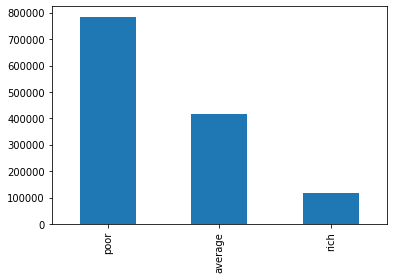

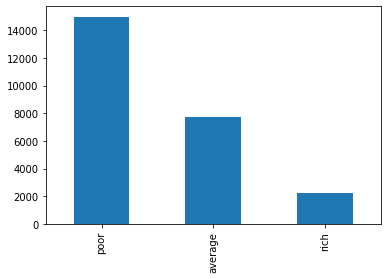

In [0]:
pd.Series(df.loc[:,'social']).value_counts().plot(kind='bar')
plt.show()
pd.Series(df_sample.loc[:,'social']).value_counts().plot(kind='bar')

Importing machine learning functions

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
mb = preprocessing.MultiLabelBinarizer()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

### II.A.2) Vectorization of text

#### II.A.2.a) Cleaning of text data

First step of cleaning : removing special characters

In [0]:
df_sample.loc[:,'text'].replace('[!"#%\'()$*+,-./:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]',' ',inplace=True,regex=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Turning review data into a list

In [0]:
X = [''.join(x) for x in df_sample.loc[:,'text']]

Lowercasing and removing '\n' symbols in the text (trailing new lines)

In [0]:
X = [x.lower() for x in X]

In [0]:
X = [x.replace('\n', '') for x in X]

In [0]:
X[0]

'i really love their pizza  my favorite is sausage mushrooms with extra garlic  their crust is delicious and i normally hate crust  i think their sauce is really full of flavor  it seems their delivery has had some hiccups and isn t always avaliable but they re great when they are '

#### II.A.2.b) Loading CountVectorizer's pretrained vocabulary (with and without stopwords)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv_no_stopwords = CountVectorizer(stop_words='english')
cv_with_stopwords = CountVectorizer()

#### II.A.2.c) Training of a Gensim Word2Vec vectorizer

Cleaning the text

In [0]:
df_train_voc.loc[:,'text'].replace('[!"#%\'()$*+,-./:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]',' ',inplace=True,regex=True)
train_voc = [''.join(x) for x in df_train_voc.loc[:,'text']]
train_voc = [x.lower() for x in train_voc]
train_voc = [x.replace('\n', '') for x in train_voc]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Splitting into words (tokenizing) the sentences.

In [0]:
splitted = [x.split() for x in train_voc]

Removing stopwords

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
clean=[]
for x in splitted :
  x= [word for word in x if not word in stopWords]
  clean.append(x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Learning vectorization on the corpus with Gensim's Word2Vec

In [0]:
from gensim.models import Word2Vec
from multiprocessing import cpu_count

cpu = cpu_count()
reviews = Word2Vec(clean, size=100, window=5, min_count=2, workers=cpu)
reviews.train(clean, total_examples=len(clean), epochs=10)
reviews_wv = reviews.wv

Let's have a look at the vocabulary

In [0]:
reviews_wv.vocab

{'lot': <gensim.models.keyedvectors.Vocab at 0x7fecd1c37b00>,
 'meat': <gensim.models.keyedvectors.Vocab at 0x7fecd1c37c50>,
 'family': <gensim.models.keyedvectors.Vocab at 0x7fecd1c37c88>,
 'hot': <gensim.models.keyedvectors.Vocab at 0x7fecd1c3c978>,
 'dog': <gensim.models.keyedvectors.Vocab at 0x7fecd16065c0>,
 'burger': <gensim.models.keyedvectors.Vocab at 0x7fecd0858c50>,
 'restaurant': <gensim.models.keyedvectors.Vocab at 0x7fecd0858f60>,
 'questionable': <gensim.models.keyedvectors.Vocab at 0x7fecd041c0b8>,
 'place': <gensim.models.keyedvectors.Vocab at 0x7fecd03aeba8>,
 'us': <gensim.models.keyedvectors.Vocab at 0x7fecd03aebe0>,
 'dine': <gensim.models.keyedvectors.Vocab at 0x7fecd03aec18>,
 'love': <gensim.models.keyedvectors.Vocab at 0x7fecd03aec50>,
 'cheese': <gensim.models.keyedvectors.Vocab at 0x7fecd03aec88>,
 'fries': <gensim.models.keyedvectors.Vocab at 0x7fecd03aecc0>,
 'general': <gensim.models.keyedvectors.Vocab at 0x7fecd03aecf8>,
 'gooey': <gensim.models.keyedvecto

Defing the vectorization function associated to this Word2Vec

In [0]:
def tokens2vectors(corpus):
  vectors_list = list()
  for sentence in corpus:
    reviewVects = list()
    for word in sentence.split():
      try: reviewVects.append(reviews_wv.get_vector(word))
      except: reviewVects.append(np.zeros(100)) 
    vectors_list.append(np.mean(reviewVects, axis=0))
  return np.array(vectors_list)

### II.A.3) Separate predictions for each categorical variable with SVMs and random forests

#### II.A.3.a) Predicting restaurant categories

Splitting test, train and development dataset

In [0]:
X_train, X_devtest, y_train, y_devtest = train_test_split(X, df_sample.loc[:,'categories'], test_size=0.4)
X_dev, X_test, y_dev, y_test = train_test_split(X_devtest, y_devtest, test_size=0.5)

Defining the evaluation function

In [0]:
def categories_prediction_eval(y_true, y_pred, lb_trained, clf):
  y_true_names = lb_trained.inverse_transform(y_true)
  y_pred_names = lb_trained.inverse_transform(y_pred)
  print( classification_report(y_true_names, y_pred_names) )
  cm = confusion_matrix(y_true_names, y_pred_names) 
  labels = ['American (Traditional)', 'Chinese', 'Italian','Mexican']
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  # config plot sizes
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
  plt.show()

##### II.A.3.a.i) With external vectorization

Vectorizing text and labels

In [0]:
X_train_cv = cv_no_stopwords.fit_transform(X_train)
X_dev_cv = cv_no_stopwords.transform(X_dev)

In [0]:
lb_trained = lb.fit(y_train)
y_train_lb = lb_trained.transform(y_train)
y_dev_lb = lb_trained.transform(y_dev)
print(y_train_lb.shape, y_dev_lb.shape)

(15000, 4) (5000, 4)


Running and evaluating svms. Note that we choose the option *class_weight='balanced'* in the svm definition; otherwise the predictor tends to overpredict the class *American (Traditional)* since it is the largest.

In [0]:
svm = LinearSVC(verbose=1,random_state=1,class_weight='balanced')
clf_svm = OneVsRestClassifier(svm).fit(X_train_cv.toarray(), y_train_lb)

[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

In [0]:
y_pred_svm = clf_svm.predict(X_dev_cv)

                        precision    recall  f1-score   support

American (Traditional)       0.69      0.84      0.76      2139
               Chinese       0.73      0.62      0.67       605
               Italian       0.75      0.62      0.68      1119
               Mexican       0.84      0.70      0.76      1137

              accuracy                           0.73      5000
             macro avg       0.75      0.70      0.72      5000
          weighted avg       0.74      0.73      0.73      5000



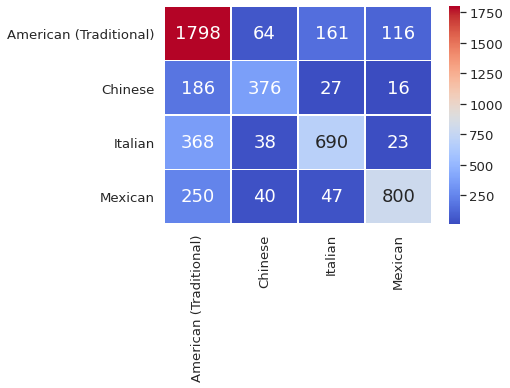

In [0]:
categories_prediction_eval(y_dev_lb, y_pred_svm, lb_trained, clf_svm)

Running and evaluating a random forest

In [0]:
rfc = RandomForestClassifier(n_estimators=200, class_weight='balanced', max_depth=None, random_state=1, n_jobs=-1, verbose=1)
rfc.fit(X_train_cv, y_train_lb)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   27.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished


                        precision    recall  f1-score   support

American (Traditional)       0.63      0.97      0.76      2139
               Chinese       0.96      0.52      0.68       605
               Italian       0.94      0.52      0.67      1119
               Mexican       0.97      0.65      0.78      1137

              accuracy                           0.74      5000
             macro avg       0.88      0.66      0.72      5000
          weighted avg       0.82      0.74      0.73      5000



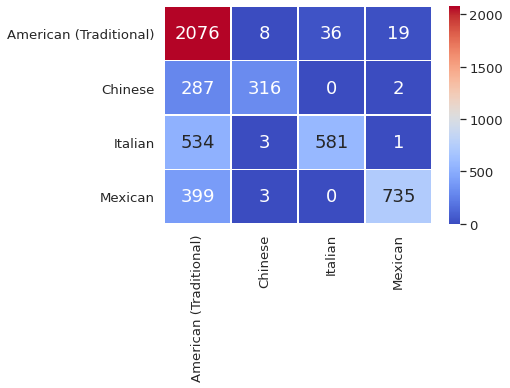

In [0]:
y_pred_rfc = rfc.predict(X_dev_cv)
categories_prediction_eval(y_dev_lb, y_pred_rfc, lb_trained, clf_svm)

##### II.A.3.a.ii) With learnt vectorization

Vectorizing the text

In [0]:
X_train_vec = tokens2vectors(X_train)
X_dev_vec = tokens2vectors(X_dev)
X_test_vec = tokens2vectors(X_test)

Running and evaluating svms. Note that we choose the option *class_weight='balanced'* in the svm definition; otherwise the predictor tends to overpredict the class *American (Traditional)* since it is the largest.

In [0]:
svm = LinearSVC(verbose=1, random_state=1,class_weight='balanced')
clf_svm = OneVsRestClassifier(svm, n_jobs=1).fit(X_train_vec, y_train_lb)

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                        precision    recall  f1-score   support

American (Traditional)       0.74      0.86      0.79      2139
               Chinese       0.68      0.75      0.71       605
               Italian       0.79      0.65      0.72      1119
               Mexican       0.90      0.73      0.81      1137

              accuracy                           0.77      5000
             macro avg       0.78      0.75      0.76      5000
          weighted avg       0.78      0.77      0.77      5000



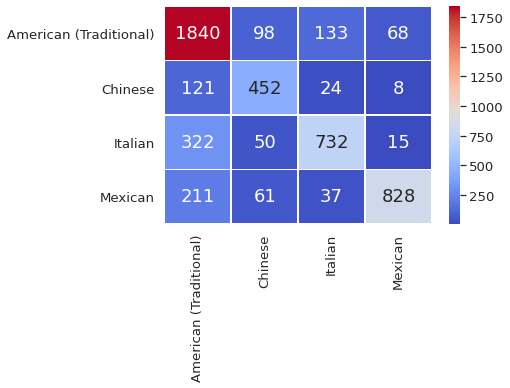

In [0]:
y_pred_svm = clf_svm.predict(X_dev_vec)
categories_prediction_eval(y_dev_lb, y_pred_svm, lb_trained, clf_svm )

Running and evaluating a random forest

In [0]:
rfc = RandomForestClassifier(n_estimators=200, class_weight='balanced', max_depth=None, random_state=1, n_jobs=-1, verbose=1)
rfc.fit(X_train_vec, y_train_lb)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.5s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.3s finished


                        precision    recall  f1-score   support

American (Traditional)       0.53      0.98      0.69      2139
               Chinese       0.94      0.29      0.44       605
               Italian       0.92      0.33      0.49      1119
               Mexican       0.98      0.43      0.59      1137

              accuracy                           0.63      5000
             macro avg       0.84      0.51      0.55      5000
          weighted avg       0.77      0.63      0.59      5000



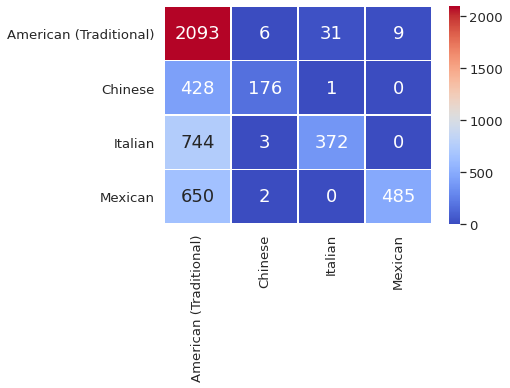

In [0]:
y_pred_rfc = rfc.predict(X_dev_vec)
categories_prediction_eval(y_dev_lb, y_pred_rfc, lb_trained, rfc )

#### II.A.3.b) Predicting restaurant ratings

Splitting test, train and development dataset

In [0]:
X_train, X_devtest, y_train, y_devtest = train_test_split(X, df_sample.loc[:,'rating'], test_size=0.4)
X_dev, X_test, y_dev, y_test = train_test_split(X_devtest, y_devtest, test_size=0.5)

Defining the evaluation function

In [0]:
def ratings_prediction_eval(y_true, y_pred, lb_trained, clf):
  y_true_names = lb_trained.inverse_transform(y_true)
  y_pred_names = lb_trained.inverse_transform(y_pred)
  print( classification_report(y_true_names, y_pred_names) )
  cm = confusion_matrix(y_true_names, y_pred_names) 
  labels = ['bad', 'excellent', 'good']
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  # config plot sizes
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
  plt.show()

##### II.A.3.b.i) With external vectorization

Vectorizing text and labels

In [0]:
X_train_cv = cv_no_stopwords.transform(X_train)
X_dev_cv = cv_no_stopwords.transform(X_dev)

In [0]:
lb_trained = lb.fit(y_train)
y_train_lb = lb_trained.transform(y_train)
y_dev_lb = lb_trained.transform(y_dev)
print(y_train_lb.shape, y_dev_lb.shape)

(15000, 3) (5000, 3)


Running and evaluating svms

In [0]:
svm = LinearSVC(verbose=1, random_state=1, class_weight='balanced')
clf_svm = OneVsRestClassifier(svm, n_jobs=1 ).fit(X_train_cv.toarray(), y_train_lb)

[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

         bad       0.60      0.83      0.69      1192
   excellent       0.70      0.70      0.70      1974
        good       0.59      0.44      0.51      1834

    accuracy                           0.64      5000
   macro avg       0.63      0.66      0.63      5000
weighted avg       0.64      0.64      0.63      5000



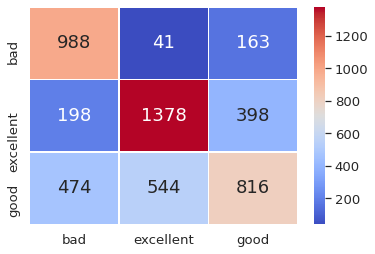

In [0]:
y_pred_svm = clf_svm.predict(X_dev_cv)
ratings_prediction_eval(y_dev_lb, y_pred_svm, lb_trained, clf_svm)

Running and evaluating a random forest

In [0]:
rfc = RandomForestClassifier(n_estimators=200, class_weight='balanced', max_depth=None, random_state=1, n_jobs=-1, verbose=1)
rfc.fit(X_train_cv, y_train_lb)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   33.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished


              precision    recall  f1-score   support

         bad       0.41      0.96      0.57      1192
   excellent       0.76      0.64      0.69      1974
        good       0.78      0.24      0.37      1834

    accuracy                           0.57      5000
   macro avg       0.65      0.61      0.54      5000
weighted avg       0.69      0.57      0.54      5000



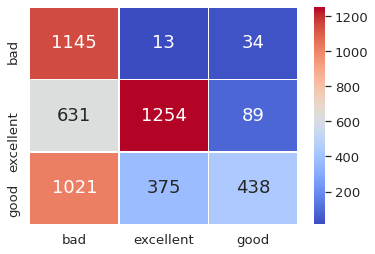

In [0]:
y_pred_rfc = rfc.predict(X_dev_cv)
ratings_prediction_eval(y_dev_lb, y_pred_rfc, lb_trained, clf_svm)

##### II.A.3.b.ii) With learnt vectorization

Vectorizing the text

In [0]:
X_train_vec = tokens2vectors(X_train)
X_dev_vec = tokens2vectors(X_dev)
X_test_vec = tokens2vectors(X_test)

In [0]:
svm = LinearSVC(verbose=1, random_state=1, class_weight='balanced')
clf_svm = OneVsRestClassifier(svm, n_jobs=1).fit(X_train_vec, y_train_lb)

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Running and evaluating svms

              precision    recall  f1-score   support

         bad       0.64      0.93      0.76      1192
   excellent       0.74      0.79      0.76      1974
        good       0.71      0.46      0.56      1834

    accuracy                           0.70      5000
   macro avg       0.70      0.72      0.69      5000
weighted avg       0.71      0.70      0.69      5000



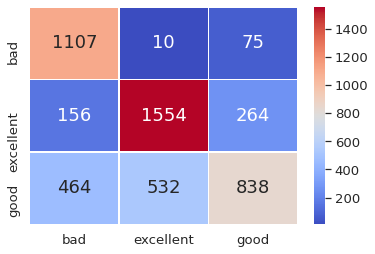

In [0]:
y_pred_svm = clf_svm.predict(X_dev_vec)
ratings_prediction_eval(y_dev_lb, y_pred_svm, lb_trained, clf_svm )

Running and evaluating random forests

In [0]:
rfc = RandomForestClassifier(n_estimators=200, class_weight='balanced', max_depth=None, random_state=1, n_jobs=-1, verbose=1)
rfc.fit(X_train_vec, y_train_lb)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.3s finished


              precision    recall  f1-score   support

         bad       0.47      0.92      0.62      1192
   excellent       0.78      0.65      0.71      1974
        good       0.71      0.40      0.51      1834

    accuracy                           0.62      5000
   macro avg       0.65      0.66      0.61      5000
weighted avg       0.68      0.62      0.62      5000



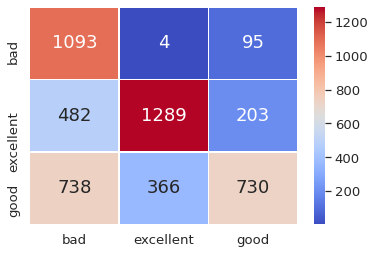

In [0]:
y_pred_rfc = rfc.predict(X_dev_vec)
ratings_prediction_eval(y_dev_lb, y_pred_rfc, lb_trained, rfc )

#### II.A.3.c) Predicting area revenue

Splitting test, train and development dataset

In [0]:
X_train, X_devtest, y_train, y_devtest = train_test_split(X, df_sample.loc[:,'social'], test_size=0.4)
X_dev, X_test, y_dev, y_test = train_test_split(X_devtest, y_devtest, test_size=0.5)

Defining the evaluation function

In [0]:
def social_prediction_eval(y_true, y_pred, lb_trained, clf):
  y_true_names = lb_trained.inverse_transform(y_true)
  y_pred_names = lb_trained.inverse_transform(y_pred)
  print( classification_report(y_true_names, y_pred_names) )
  cm = confusion_matrix(y_true_names, y_pred_names) 
  labels = ['average','poor', 'rich']
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  # config plot sizes
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
  plt.show()

##### II.A.3.c.i) With external vectorization

Vectorizing text and labels

In [0]:
X_train_cv = cv_no_stopwords.transform(X_train)
X_dev_cv = cv_no_stopwords.transform(X_dev)

In [0]:
lb_trained = lb.fit(y_train)
y_train_lb = lb_trained.transform(y_train)
y_dev_lb = lb_trained.transform(y_dev)
print(y_train_lb.shape, y_dev_lb.shape)

(15000, 3) (5000, 3)


Running and evaluating svms

In [0]:
svm = LinearSVC(verbose=1, random_state=1,class_weight='balanced')
clf_svm = OneVsRestClassifier(svm, n_jobs=1 ).fit(X_train_cv.toarray(), y_train_lb)

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

     average       0.38      0.54      0.44      1570
        poor       0.68      0.57      0.62      2967
        rich       0.16      0.08      0.11       463

    accuracy                           0.52      5000
   macro avg       0.40      0.40      0.39      5000
weighted avg       0.53      0.52      0.52      5000



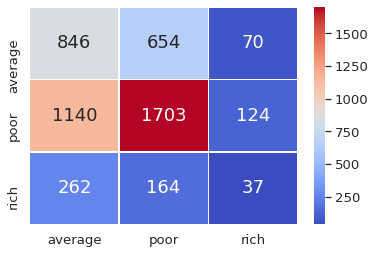

In [0]:
y_pred_svm = clf_svm.predict(X_dev_cv)
social_prediction_eval(y_dev_lb, y_pred_svm, lb_trained, clf_svm)

Running and evaluating a random forest

In [0]:
rfc = RandomForestClassifier(n_estimators=200,class_weight='balanced', max_depth=None, random_state=1, n_jobs=-1, verbose=1)
rfc.fit(X_train_cv, y_train_lb)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   41.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     average       0.46      0.14      0.22      1570
        poor       0.61      0.94      0.74      2967
        rich       0.00      0.00      0.00       463

    accuracy                           0.60      5000
   macro avg       0.36      0.36      0.32      5000
weighted avg       0.51      0.60      0.51      5000



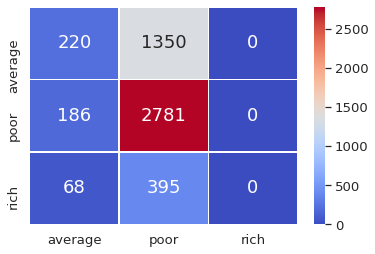

In [0]:
y_pred_rfc = rfc.predict(X_dev_cv)
social_prediction_eval(y_dev_lb, y_pred_rfc, lb_trained, clf_svm)

##### II.A.3.c.ii) With learnt vectorization

Vectorizing the text

In [0]:
X_train_vec = tokens2vectors(X_train)
X_dev_vec = tokens2vectors(X_dev)
X_test_vec = tokens2vectors(X_test)

Running and evaluting svms

In [0]:
svm = LinearSVC(verbose=1, random_state=1,class_weight='balanced')
clf_svm = OneVsRestClassifier(svm, n_jobs=1).fit(X_train_vec, y_train_lb)

[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

     average       0.39      0.62      0.48      1570
        poor       0.71      0.53      0.61      2967
        rich       0.14      0.08      0.10       463

    accuracy                           0.52      5000
   macro avg       0.41      0.41      0.40      5000
weighted avg       0.56      0.52      0.52      5000



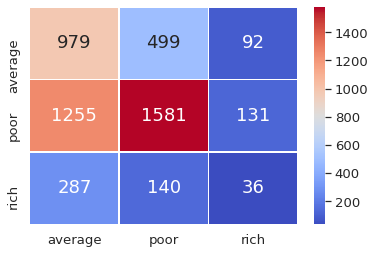

In [0]:
y_pred_svm = clf_svm.predict(X_dev_vec)
social_prediction_eval(y_dev_lb, y_pred_svm, lb_trained, clf_svm )

Running and evaluating a random forest

In [0]:
rfc = RandomForestClassifier(n_estimators=200,class_weight='balanced', max_depth=None, random_state=42, n_jobs=-1, verbose=1)
rfc.fit(X_train_vec, y_train_lb)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   16.6s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     average       0.41      0.08      0.13      1570
        poor       0.60      0.96      0.74      2967
        rich       0.00      0.00      0.00       463

    accuracy                           0.59      5000
   macro avg       0.34      0.34      0.29      5000
weighted avg       0.49      0.59      0.48      5000



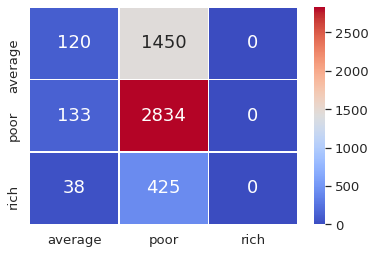

In [0]:
y_pred_rfc = rfc.predict(X_dev_vec)
social_prediction_eval(y_dev_lb, y_pred_rfc, lb_trained, rfc )

###II.A.4) Joint prediction of categorical variables with SVMs and random forests

#### II.A.4.a) Jointly predicting three categories with a single multilabel predictor

The *OneVsRestClassifier* and *RandomForestClassifier* functions we used before tolerate multilabel dependant variable. The main change is actually in the vectorization of this multilabel variable, since we now use *MultiLabelBinarizer*.

Splitting test, train and development set

In [0]:
X_train, X_devtest, y_train, y_devtest = train_test_split(X, df_sample.loc[:,['categories','rating','social']], test_size=0.4)
X_dev, X_test, y_dev, y_test = train_test_split(X_devtest, y_devtest, test_size=0.5)

Defining the evaluation function. Note that, this time we build a binary confusion matrix for each of the 10 labels.

In [0]:
def joint_prediction_eval(y_true, y_pred):
  from sklearn.metrics import multilabel_confusion_matrix
  matrix=multilabel_confusion_matrix(y_true, y_pred)
  labels=['American (Traditional)','Chinese', 'Italian','Mexican','bad', 'excellent', 'good','average','poor', 'rich']
  from sklearn.metrics import precision_recall_fscore_support
  scores=precision_recall_fscore_support(y_true, y_pred)
  for k in range(len(labels)):
    print('Binary confusion matrix for',labels[k])
    sn.heatmap(matrix[k], annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidth=0.5, fmt="")
    plt.show()
    print('Accuracy :',(matrix[k][0][0]+matrix[k][1][1])/np.sum(matrix[k]))
    print('Precision :', scores[0][k])
    print('Recall :', scores[1][k])
    print('F1-score', scores[2][k])
  
  '\n'

##### II.A.4.i) With external vectorization

Vectorizing text and labels

In [0]:
X_train_cv = cv_no_stopwords.transform(X_train)
X_dev_cv = cv_no_stopwords.transform(X_dev)

In [0]:
y_train=y_train.to_numpy()
y_dev=y_dev.to_numpy()
y_test=y_test.to_numpy()

In [0]:
mb_trained = mb.fit(y_train)
y_train_mb = mb_trained.transform(y_train)
y_dev_mb = mb_trained.transform(y_dev)
print(y_train_mb.shape, y_dev_mb.shape)

(15000, 10) (5000, 10)


Running and evaluating svms

In [0]:
svm_multilabel = LinearSVC(verbose=1, random_state=1,max_iter=2000, class_weight='balanced')
clf_svm_multilabel = OneVsRestClassifier(svm_multilabel, n_jobs=1 ).fit(X_train_cv.toarray(), y_train_mb)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

Binary confusion matrix for American (Traditional)


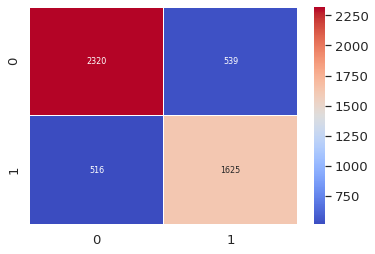

Accuracy : 0.789
Precision : 0.7509242144177449
Recall : 0.7589911256422233
F1-score 0.7549361207897795
Binary confusion matrix for Chinese


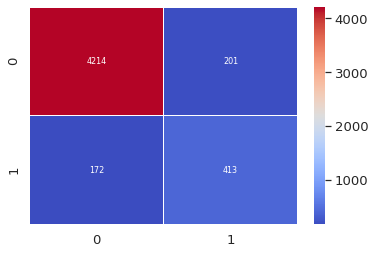

Accuracy : 0.9254
Precision : 0.6726384364820847
Recall : 0.705982905982906
F1-score 0.6889074228523769
Binary confusion matrix for Italian


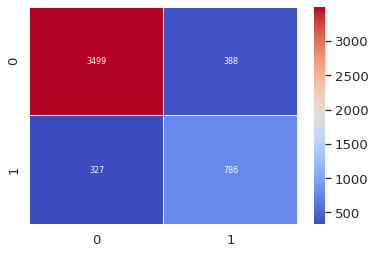

Accuracy : 0.857
Precision : 0.6695059625212947
Recall : 0.706199460916442
F1-score 0.6873633581110624
Binary confusion matrix for Mexican


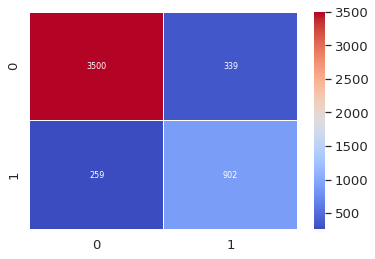

Accuracy : 0.8804
Precision : 0.7268331990330379
Recall : 0.7769164513350559
F1-score 0.7510407993338885
Binary confusion matrix for bad


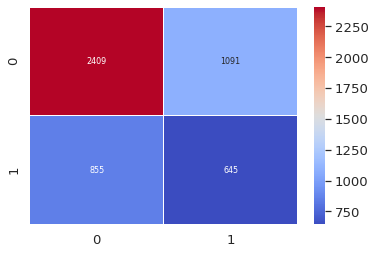

Accuracy : 0.6108
Precision : 0.3715437788018433
Recall : 0.43
F1-score 0.39864029666254636
Binary confusion matrix for excellent


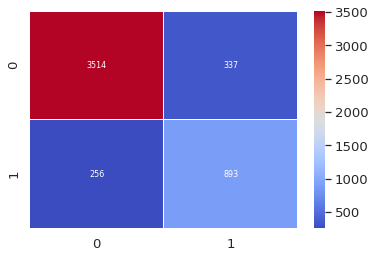

Accuracy : 0.8814
Precision : 0.7260162601626017
Recall : 0.7771975630983464
F1-score 0.7507356031946197
Binary confusion matrix for good


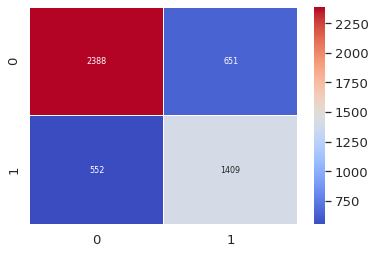

Accuracy : 0.7594
Precision : 0.6839805825242719
Recall : 0.7185109637939827
F1-score 0.700820691370306
Binary confusion matrix for average


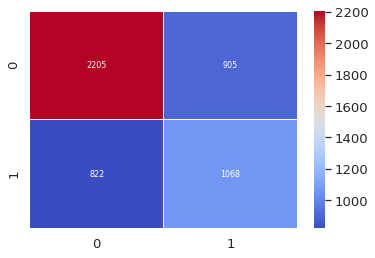

Accuracy : 0.6546
Precision : 0.5413076533198176
Recall : 0.5650793650793651
F1-score 0.5529381309862801
Binary confusion matrix for poor


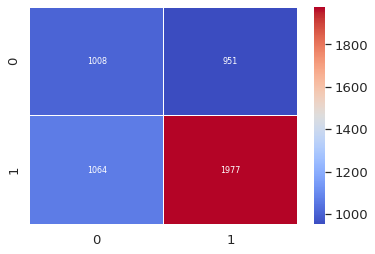

Accuracy : 0.597
Precision : 0.6752049180327869
Recall : 0.6501150937191713
F1-score 0.6624225163343944
Binary confusion matrix for rich


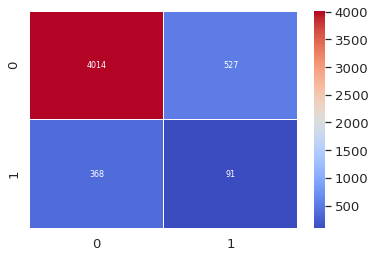

Accuracy : 0.821
Precision : 0.14724919093851133
Recall : 0.19825708061002179
F1-score 0.1689879294336119


In [0]:
y_pred_svm = clf_svm_multilabel.predict(X_dev_cv)
joint_prediction_eval(y_dev_mb, y_pred_svm)

Running and evaluating a random forest

In [0]:
rfc_multilabel = RandomForestClassifier(n_estimators=200, max_depth=None, class_weight='balanced', random_state=1, n_jobs=-1, verbose=1)
rfc_multilabel.fit(X_train_cv, y_train_mb)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   50.7s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Binary confusion matrix for American (Traditional)


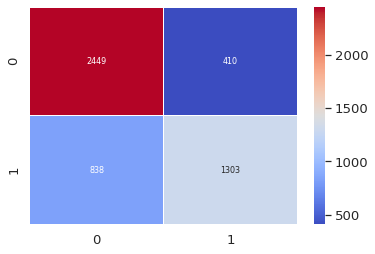

Accuracy : 0.7504
Precision : 0.7606538237011091
Recall : 0.6085941148995796
F1-score 0.6761805915931498
Binary confusion matrix for Chinese


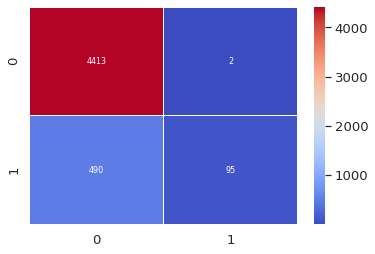

Accuracy : 0.9016
Precision : 0.979381443298969
Recall : 0.1623931623931624
F1-score 0.2785923753665689
Binary confusion matrix for Italian


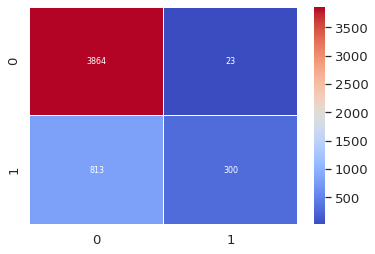

Accuracy : 0.8328
Precision : 0.9287925696594427
Recall : 0.2695417789757412
F1-score 0.4178272980501393
Binary confusion matrix for Mexican


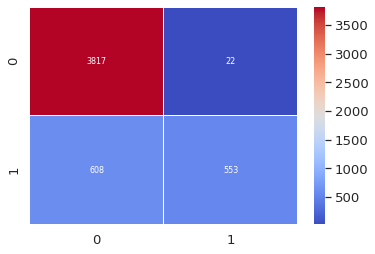

Accuracy : 0.874
Precision : 0.9617391304347827
Recall : 0.4763135228251507
F1-score 0.6370967741935484
Binary confusion matrix for bad


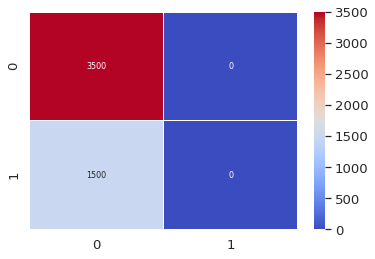

Accuracy : 0.7
Precision : 0.0
Recall : 0.0
F1-score 0.0
Binary confusion matrix for excellent


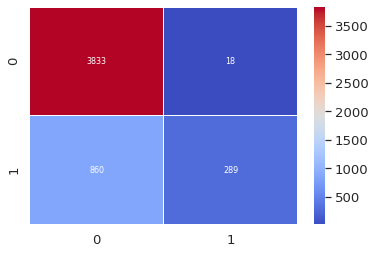

Accuracy : 0.8244
Precision : 0.9413680781758957
Recall : 0.2515230635335074
F1-score 0.3969780219780219
Binary confusion matrix for good


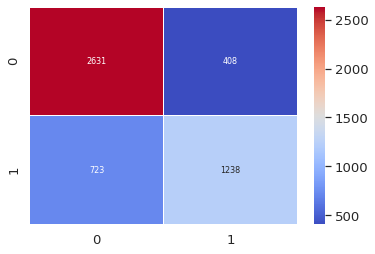

Accuracy : 0.7738
Precision : 0.7521263669501823
Recall : 0.6313105558388578
F1-score 0.6864430274466317
Binary confusion matrix for average


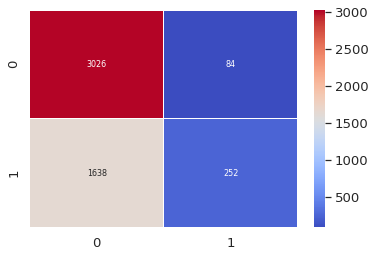

Accuracy : 0.6556
Precision : 0.75
Recall : 0.13333333333333333
F1-score 0.22641509433962267
Binary confusion matrix for poor


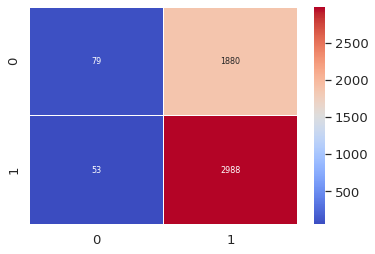

Accuracy : 0.6134
Precision : 0.6138044371405095
Recall : 0.9825715225254851
F1-score 0.7555948918953092
Binary confusion matrix for rich


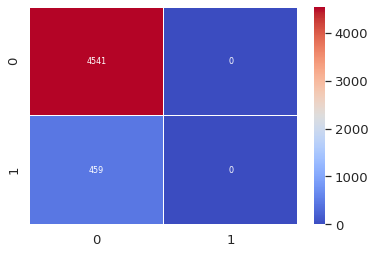

Accuracy : 0.9082
Precision : 0.0
Recall : 0.0
F1-score 0.0


In [0]:
y_pred_rfc = rfc_multilabel.predict(X_dev_cv)
joint_prediction_eval(y_dev_mb, y_pred_rfc)

In [0]:
print(X_dev_cv.shape)

(5000, 26156)


##### II.A.4.ii) With learnt vectorization

Vectorizing the text

In [0]:
X_train_vec = tokens2vectors(X_train)
X_dev_vec = tokens2vectors(X_dev)
X_test_vec = tokens2vectors(X_test)

Running and evaluating svms

In [0]:
svm = LinearSVC(verbose=1, random_state=1,max_iter=2000,class_weight='balanced')
clf_svm = OneVsRestClassifier(svm, n_jobs=1 ).fit(X_train_vec, y_train_mb)

[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Binary confusion matrix for American (Traditional)


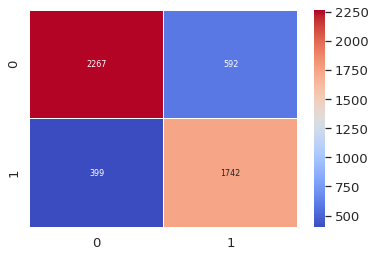

Accuracy : 0.8018
Precision : 0.7463581833761782
Recall : 0.8136384866884633
F1-score 0.7785474860335195
Binary confusion matrix for Chinese


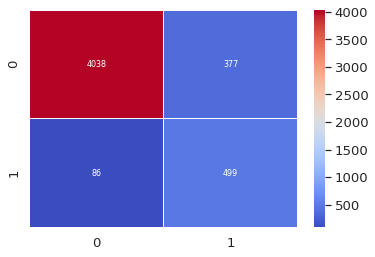

Accuracy : 0.9074
Precision : 0.569634703196347
Recall : 0.852991452991453
F1-score 0.6830937713894593
Binary confusion matrix for Italian


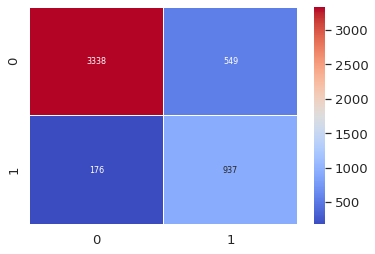

Accuracy : 0.855
Precision : 0.6305518169582772
Recall : 0.8418688230008985
F1-score 0.7210465563678338
Binary confusion matrix for Mexican


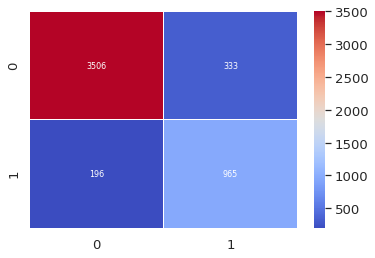

Accuracy : 0.8942
Precision : 0.7434514637904468
Recall : 0.8311800172265289
F1-score 0.7848718991459943
Binary confusion matrix for bad


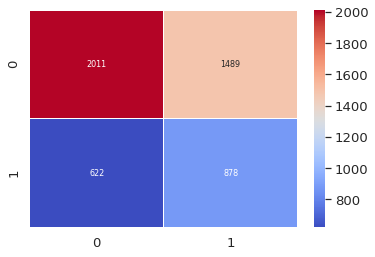

Accuracy : 0.5778
Precision : 0.3709336713138994
Recall : 0.5853333333333334
F1-score 0.45409878458753555
Binary confusion matrix for excellent


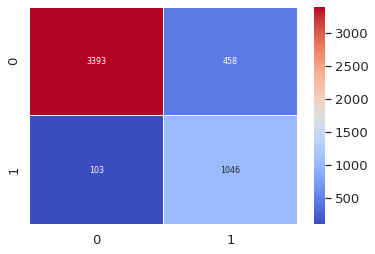

Accuracy : 0.8878
Precision : 0.6954787234042553
Recall : 0.9103568320278503
F1-score 0.7885412740294007
Binary confusion matrix for good


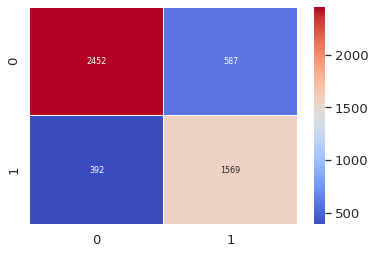

Accuracy : 0.8042
Precision : 0.7277365491651205
Recall : 0.8001019887812341
F1-score 0.7622054894340539
Binary confusion matrix for average


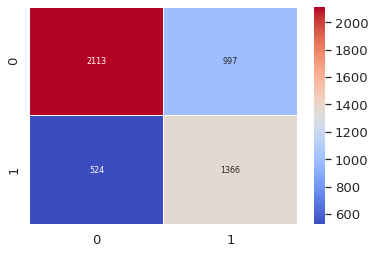

Accuracy : 0.6958
Precision : 0.5780787134997885
Recall : 0.7227513227513227
F1-score 0.6423700916999765
Binary confusion matrix for poor


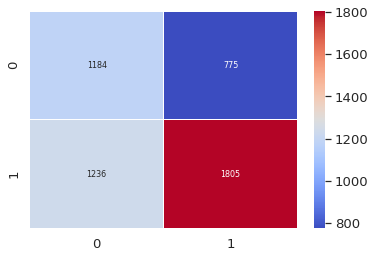

Accuracy : 0.5978
Precision : 0.6996124031007752
Recall : 0.5935547517264058
F1-score 0.6422344778509163
Binary confusion matrix for rich


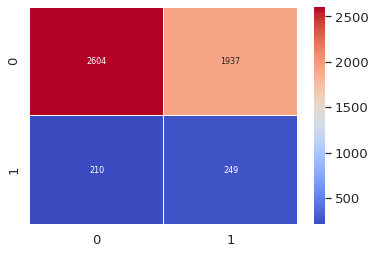

Accuracy : 0.5706
Precision : 0.11390667886550777
Recall : 0.5424836601307189
F1-score 0.1882797731568998


In [0]:
y_pred_svm = clf_svm.predict(X_dev_vec)
joint_prediction_eval(y_dev_mb, y_pred_svm)

Running and evaluating a random forest

In [0]:
rfc = RandomForestClassifier(n_estimators=200,class_weight='balanced', max_depth=None, random_state=42, n_jobs=-1, verbose=1)
rfc.fit(X_train_vec, y_train_mb)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   24.3s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Binary confusion matrix for American (Traditional)


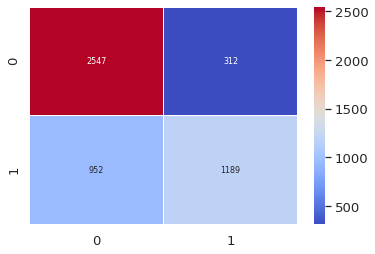

Accuracy : 0.7472
Precision : 0.7921385742838108
Recall : 0.5553479682391406
F1-score 0.6529379461834157
Binary confusion matrix for Chinese


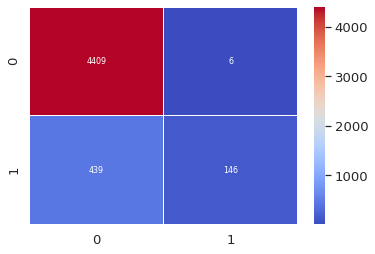

Accuracy : 0.911
Precision : 0.9605263157894737
Recall : 0.24957264957264957
F1-score 0.3962008141112619
Binary confusion matrix for Italian


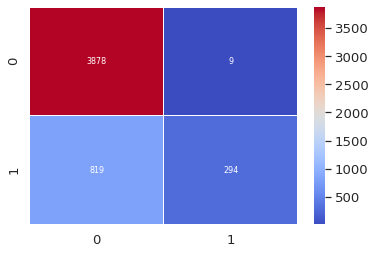

Accuracy : 0.8344
Precision : 0.9702970297029703
Recall : 0.2641509433962264
F1-score 0.4152542372881356
Binary confusion matrix for Mexican


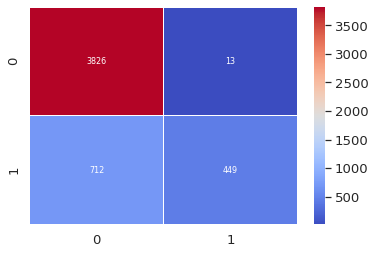

Accuracy : 0.855
Precision : 0.9718614718614719
Recall : 0.3867355727820844
F1-score 0.5532963647566236
Binary confusion matrix for bad


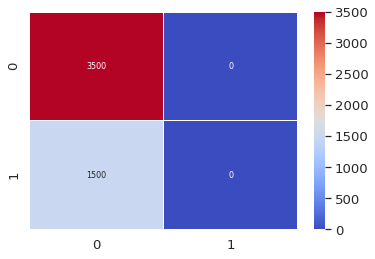

Accuracy : 0.7
Precision : 0.0
Recall : 0.0
F1-score 0.0
Binary confusion matrix for excellent


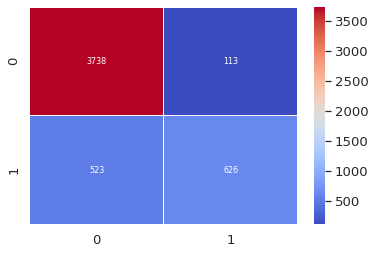

Accuracy : 0.8728
Precision : 0.8470906630581867
Recall : 0.5448215839860748
F1-score 0.663135593220339
Binary confusion matrix for good


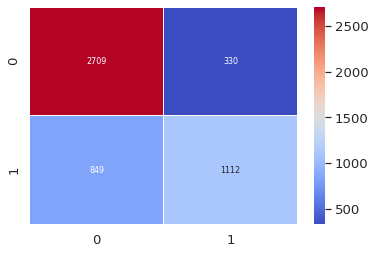

Accuracy : 0.7642
Precision : 0.7711511789181692
Recall : 0.5670576236613972
F1-score 0.6535409932412577
Binary confusion matrix for average


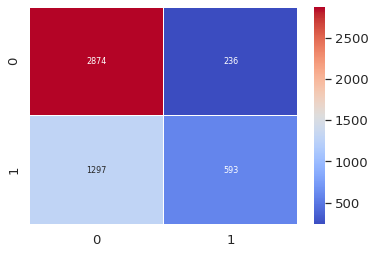

Accuracy : 0.6934
Precision : 0.715319662243667
Recall : 0.31375661375661373
F1-score 0.4361897756528135
Binary confusion matrix for poor


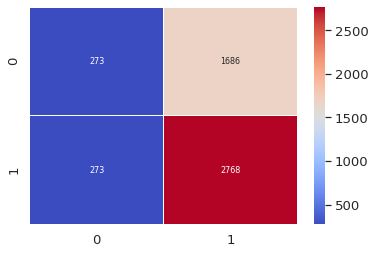

Accuracy : 0.6082
Precision : 0.6214638527166592
Recall : 0.9102268990463663
F1-score 0.7386257505003336
Binary confusion matrix for rich


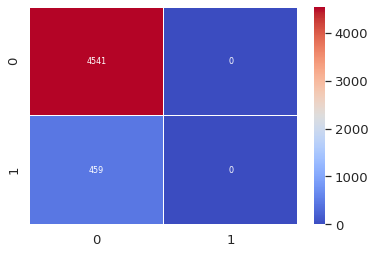

Accuracy : 0.9082
Precision : 0.0
Recall : 0.0
F1-score 0.0


In [0]:
y_pred_rfc = rfc.predict(X_dev_vec)
joint_prediction_eval(y_dev_mb, y_pred_rfc)

#### II.A.4.b) Predicting a single categorical variable which contains information on the three categories

We could use the variable *combined* we created in I.D). However, there are 4X3X3=36 different classes to predict. In this case, due to RAM limitations, SVMs are only functioning with a very small text sample. We just give the code below as an illustration. (We do not run the algorithms).

In [0]:
X_train, X_devtest, y_train, y_devtest = train_test_split(X, df_sample.loc[:,'combined'], test_size=0.4)
X_dev, X_test, y_dev, y_test = train_test_split(X_devtest, y_devtest, test_size=0.5)

Vectorizing text and labels

In [0]:
X_train_cv = cv_no_stopwords.transform(X_train)
X_dev_cv = cv_no_stopwords.transform(X_dev)

In [0]:
lb_trained = lb.fit(y_train)
y_train_lb = lb_trained.transform(y_train)
y_dev_lb = lb_trained.transform(y_dev)
print(y_train_lb.shape, y_dev_lb.shape)

(15000, 36) (5000, 36)


Running and evaluating svms

In [0]:
svm = LinearSVC(verbose=1, random_state=1,class_weight='balanced')
clf_svm = OneVsRestClassifier(svm, n_jobs=1 ).fit(X_train_cv.toarray(), y_train_lb)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear]

In [0]:
y_pred_svm = clf_svm.predict(X_dev_cv)

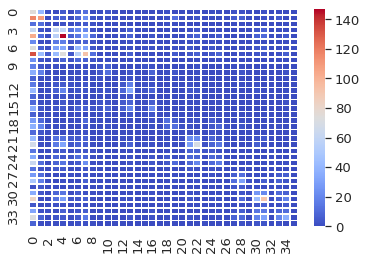

In [0]:
y_true_names = lb_trained.inverse_transform(y_dev_lb)
y_pred_names = lb_trained.inverse_transform(y_pred_svm)
cm = confusion_matrix(y_true_names, y_pred_names) 
df_cm = pd.DataFrame(cm)
sn.set(font_scale=1.2)
sn.heatmap(df_cm, annot=False, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
plt.show()

Here the results are quite poor : 36 categories are probably too much for the size of our dataset. We just see that some diagonal terms are a bit "clearer" on the confusion matrix.

Running a random forest

In [0]:
# rfc = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=1, n_jobs=-1, verbose=1)
# rfc.fit(X_train_cv, y_train_lb)

Note : for most of the binary svms we run during our classification tasks, we get a warning about the non-convergence of the algorithms. We could overcome this problem increasing the number of iterations in *LinearSVC* (setting the number of parameter in the classifier much higher than the standard option *max_iter=1000* or even infinite), but this would quickly lead us to exceed available RAM. Another possibility is to take a much smaller dataset, but performance would be quite poor. Actually, we prefered to show you the results as they are here after 1000 iterations (or 2000 when RAM allows), since most of the rime they are already quite significant even if svm algorithms (i.e. border definition) have not totally converged according to sklearn's criteria.

## II.B) Prediction of characteristics using BERT

This section draws on code from the tutorials, a blog post from Chris McCormick (https://mccormickml.com/2019/07/22/BERT-fine-tuning/) and the `run_glue.py` from HuggingFace (https://github.com/huggingface/transformers/blob/master/examples/run_glue.py).

### II.B.1) Initialization

Before we start fine-tuning BERT for our classification tasks, we initialize the working the environment. In particular, we set up the notebook to use GPU computing with PyTorch.

In [0]:
#Initialization
!pip install transformers
!pip install tqdm

import re
import numpy as np
import pandas as pd
import random
import time
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sn

import torch
device = torch.device("cuda")
print(torch.cuda.get_device_name(0))

from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

%matplotlib inline

seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

     |████████████████████████████████| 573kB 2.7MB/s 
     |████████████████████████████████| 3.7MB 49.6MB/s 
     |████████████████████████████████| 1.0MB 49.3MB/s 
     |████████████████████████████████| 870kB 33.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=135ba9b509afe10a8cfade5ef1a5ba03c7fcf4ba9ade53bb3428700cad9bdab9
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses
Tesla P100-PCIE-16GB


We create a training set of 25000 observations, and a test set of 1000 observations, in order to limit the running time of the computations. With 25000 observations and a batch size of 32, BERT is trained for four epochs in around half an hour.

In [0]:
# Load the Yelp dataset with additional data
yelp_df = pd.read_pickle("/content/yelp_data_09042020.pkl")
# Reshuffle, and reset the index
yelp_df = yelp_df.sample(frac=1).reset_index(drop=True)

#Create test dataset
yelp_test = yelp_df.iloc[150000:151000].reset_index(drop=True)
yelp_test.stars_x = yelp_test.stars_x.astype(float).astype(int)

#Create training dataset
yelp_df = yelp_df.head(25000)
yelp_df.stars_x = yelp_df.stars_x.astype(float).astype(int)
yelp_df.head()

,review_id,user_id,business_id,stars_x,text,date,name,address,city,state,postal_code,review_count,is_open,attributes,categories,number_taxpayers_postcode,postcode_average_revenue,proportion_low_revenue,proportion_high_revenue,rating,social,combined
0,M6CJslRfN3_g1J2rOPU0-w,J3xHqRsVkJuNwcFHnJy2hA,xfWdUmrz2ha3rcigyITV0g,5,Highly recommend Gordon Ramsay's restaurant. T...,2018-07-24 19:44:01,Gordon Ramsay Burger,3667 Las Vegas Blvd S,Las Vegas,NV,89109,1781.0,1.0,"{'BusinessParking': '{'garage': True, 'street'...",American (Traditional),3460.0,95881.502890,37.283237,13.872832,excellent,poor,American (Traditional)_excellent_poor
1,TXkgZ6EZo9wOooj1BBM8UA,mPmnKSIHUt3m0h63RTD8mA,Yl05MqCs9xRzrJFkGWLpgA,5,This is my all time favorite for Sunday brunch...,2017-12-10 01:18:07,Hash Kitchen,8777 N Scottsdale Rd,Scottsdale,AZ,85253,1428.0,1.0,"{'Alcohol': 'u'full_bar'', 'Smoking': 'u'no'',...",American (Traditional),8110.0,197148.581998,21.454994,39.827374,excellent,rich,American (Traditional)_excellent_rich
2,6YLJotoDzPXQSrcTyWZZZw,c1JLRlTeRaji3f79mipaIA,J7KlrDFrriWoRkIUVNRPbg,3,"Came here on our first night in Vegas, definit...",2018-06-24 04:57:54,Tacos N' Ritas,"MGM Grand, 3799 Las Vegas Blvd",Las Vegas,NV,89109,176.0,1.0,"{'Ambience': '{'romantic': False, 'intimate': ...",Mexican,3460.0,95881.502890,37.283237,13.872832,good,poor,Mexican_good_poor
3,7No3Otd6JRQHgZnuqvunIw,flTIGpKheG0RMPacLjqxzg,6Na0jTJjX5GQY_ZJ53G02A,4,"Driving around town, I started to crave for so...",2015-05-22 01:12:46,Verrazano Pizza,"2381 E Windmill Ln, Ste 20",Las Vegas,NV,89123,111.0,0.0,"{'Ambience': '{'romantic': False, 'intimate': ...",Italian,28380.0,64627.378436,31.042988,3.241720,good,poor,Italian_good_poor
4,fR6vf8ZZjlNk6Iw0jvUi0w,JZRmxL6ioEugaZQvZRGVAQ,sLTEFH8XJXQWE_Gyp3_KIA,5,Absolutely fantastic place to eat breakfast! ...,2016-02-27 22:40:18,JT's Diner,38740 Lakeshore Blvd,Willoughby,OH,44094,49.0,1.0,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...",American (Traditional),20070.0,72153.712008,29.995017,4.733433,excellent,average,American (Traditional)_excellent_average


### II.B.2) Review classification

#### II.B.2.a) Training and test sets

We create small functions to go from text labels or numerical values to integer values suitable for PyTorch computing, as well as their inverse. We then use them to create sets of labels for various sequence classification tasks.

In [0]:
# Classify reviews based on stars

def stars_label_012(x):
  if x == 1 or x == 2:
    return 0
  elif x == 3 or x == 4:
    return 1
  else:
    return 2

def stars_label_012_inverse(x):
  if x == 0:
    return "1 or 2"
  elif x == 1:
    return "3 or 4"
  else:
    return "5"

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

def categories_label_0123(x):
  if x == "American (Traditional)":
    return 0
  elif x == "Mexican":
    return 1
  elif x == "Italian":
    return 2
  else:
    return 3

def categories_label_0123_inverse(x):
  if x == 0:
    return "American (Traditional)"
  elif x == 1:
    return "Mexican"
  elif x == 2:
    return "Italian"
  else:
    return "Chinese"

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

def resqua_label_012(x):
  if x == "bad":
    return 0
  elif x == "good":
    return 1
  else:
    return 2

def resqua_label_012_inverse(x):
  if x == 0:
    return "bad"
  elif x == 1:
    return "good"
  else:
    return "excellent"

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

def area_label_012(x):
  if x == "poor":
    return 0
  elif x == "average":
    return 1
  else:
    return 2

def area_label_012_inverse(x):
  if x == 0:
    return "poor"
  elif x == 1:
    return "average"
  else:
    return "rich"

# Split reviews into sentences
# With regular expression

def removeMultSpaces(x):
  x = re.sub("\s+", " ", x)
  return x
def findFirstSentence(x):
  search = re.search(pattern = '^[\w\s\'\",:;&()/\$%\[\]]*([.\?!]?\s?|$)', string = x)
  fs = x[search.start():search.end()]
  return fs

In [0]:
#Create sentences and labels object for training
sentences = yelp_df.text.apply(removeMultSpaces).values

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# LABELS : evaluation bad/good/excellent
labels_review_012 = yelp_df.stars_x.apply(stars_label_012).values
# LABELS : evaluation 1-5 star
labels_review_stars = yelp_df.stars_x.apply(lambda x : x - 1).values
# LABELS : restaurant type
labels_restype = yelp_df.categories.apply(categories_label_0123).values
# LABELS : restaurant quality
labels_resqua = yelp_df.rating.apply(resqua_label_012).values
# LABELS : area SES
labels_area = yelp_df.social.apply(area_label_012).values

In [0]:
# Create sentence and label lists for test set
test_sentences = yelp_test.text.apply(removeMultSpaces).values

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# LABELS : evaluation bad/good/excellent
test_labels_review_012 = yelp_test.stars_x.apply(stars_label_012).values
# LABELS : evaluation 1-5 star
test_labels_review_stars = yelp_test.stars_x.apply(lambda x : x - 1).values
# LABELS : restaurant type
test_labels_restype = yelp_test.categories.apply(categories_label_0123).values
# LABELS : restaurant quality
test_labels_resqua = yelp_test.rating.apply(resqua_label_012).values
# LABELS : area SES
test_labels_area = yelp_test.social.apply(area_label_012).values


#### II.B.2.b) Function definitions

The training function tokenizes the training set, splits it into a training set and a validation set, and fine-tunes BERT starting from the pretrained weights given in input.

In [0]:
def accuracy(preds, labels):
  predictions = np.argmax(preds, axis=1).flatten()
  labels = labels.flatten()
  return np.sum(predictions == labels) / len(labels)

def train_BERT(model, epochs, batch_size, sentences, labels, max_length, training_fraction):
  input_ids = []
  attention_masks = []

  for sentence in tqdm(sentences, desc = "Tokenizing"):
    encoded_dict = tokenizer.encode_plus(
        sentence,                      
        add_special_tokens = True,      # Add '[CLS]' and '[SEP]'
        max_length = max_length,  
        pad_to_max_length = True,       # Pad sentence with 0
        return_attention_mask = True,   
        return_tensors = 'pt',          # Pytorch tensors.
        )
       
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

  # Convert into tensors.
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  labels = torch.tensor(labels)

  tqdm.write("\nSetting up the training...\n")
  dataset = TensorDataset(input_ids, attention_masks, labels)
  training_length = int(training_fraction * len(dataset))
  validation_length = len(dataset) - int(training_fraction * len(dataset))
  training_dataset, validation_dataset = random_split(
      dataset, [training_length, validation_length]
      )

  # Create the DataLoaders
  training_dataloader = DataLoader(
      training_dataset,
      sampler = RandomSampler(training_dataset),
      batch_size = batch_size
      )

  validation_dataloader = DataLoader(
      validation_dataset,
      sampler = SequentialSampler(validation_dataset),
      batch_size = batch_size
      )
  model.cuda()

  #Set the optimizer
  optimizer = AdamW(model.parameters(), lr = 2e-5, eps = 1e-8)

  total_steps = len(training_dataloader) * epochs

  # Create the learning rate scheduler.
  scheduler = get_linear_schedule_with_warmup(
      optimizer,
      num_warmup_steps = 0,
      num_training_steps = total_steps
      )
  
  training_stats = []
  training_loss = []
  training_accuracy = []
  validation_loss = []
  validation_accuracy = []

  tqdm.write("===== ===== ===== ===== ===== ===== ===== =====")
  time_begin_training = time.time()
  for epoch_index in range(0, epochs):

    tqdm.write('Training - Epoch {}'.format(epoch_index + 1))
      
    # Reset
    total_train_loss = 0
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(training_dataloader):

      # Unpack this training batch from our dataloader.
      batch_input_ids = batch[0].to(device)
      batch_input_mask = batch[1].to(device)
      batch_labels = batch[2].to(device)

      model.zero_grad()

      loss, logits = model(
          batch_input_ids,
          token_type_ids=None,
          attention_mask=batch_input_mask,
          labels=batch_labels
          )

      training_loss.append(loss.item())
      total_train_loss += loss.item()

      # Progress update every 100 batches.
      if step % 100 == 0 and not step == 0:
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = batch_labels.to('cpu').numpy()
        tqdm.write('Batch {:4d} of {:4d}, Loss: {:4.2f}, Accuracy: {:4.2f}'.format(
            step,
            len(training_dataloader),
            loss.item(),
            accuracy(logits, label_ids)
            ))
      
      loss.backward()

      # Clip the norm of the gradients to 1.0.
      # This is to help prevent the "exploding gradients" problem.
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

      # Update parameters
      optimizer.step()
      scheduler.step()

    #End of epoch :
    tqdm.write("----- ----- ----- ----- ----- ----- ----- -----")
    avg_train_loss = total_train_loss / len(training_dataloader)
    tqdm.write("Average Training Loss: {:4.2f}".format(avg_train_loss))
    
    # Validation
    # Put the model in evaluation mode
    # --the dropout layers behave differently during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

      batch_input_ids = batch[0].to(device)
      batch_input_mask = batch[1].to(device)
      batch_labels = batch[2].to(device)

      with torch.no_grad():
        (loss, logits) = model(
            batch_input_ids,
            token_type_ids=None,
            attention_mask=batch_input_mask,
            labels=batch_labels
            )

      validation_loss.append(loss.item())
      total_eval_loss += loss.item()

      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = batch_labels.to('cpu').numpy()

      validation_accuracy.append(accuracy(logits, label_ids))
      total_eval_accuracy += accuracy(logits, label_ids)

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    avg_val_loss = total_eval_loss / len(validation_dataloader)
      
    tqdm.write("Validation   -   Loss: {:4.2f}, Accuracy: {:4.2f}".format(avg_val_loss, avg_val_accuracy))
    tqdm.write("===== ===== ===== ===== ===== ===== ===== =====")
  tqdm.write("Training complete!")
  tqdm.write("Total training took {:.2f} seconds".format(time.time() - time_begin_training))

The test function takes as main input the model (now fine-tuned) and the test set, it tokenizes the input, and returns predicted labels for the sentences.

In [0]:
def test_BERT(model, batch_size, sentences, labels, max_length):

  # Tokenize
  input_ids = []
  attention_masks = []

  for sentence in tqdm(sentences, desc = "Tokenizing"):
    encoded_dict = tokenizer.encode_plus(
        sentence,
        add_special_tokens = True,
        max_length = max_length,
        pad_to_max_length = True,
        return_attention_mask = True,
        return_tensors = 'pt',
        )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  labels = torch.tensor(labels)

  # Create the necessary objects for prediction
  prediction_data = TensorDataset(input_ids, attention_masks, labels)
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

  # Prediction
  tqdm.write('Predicting labels for {} test sentences...'.format(len(input_ids)))

  # Put model in evaluation mode
  model.eval()

  predictions, true_labels = [], []

  for batch in prediction_dataloader:

    batch = tuple(t.to(device) for t in batch)
    batch_input_ids, batch_input_mask, batch_labels = batch

    with torch.no_grad():
      outputs = model(
          batch_input_ids,
          token_type_ids=None,
          attention_mask=batch_input_mask
          )

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = batch_labels.to('cpu').numpy()

    predictions.append(logits)
    true_labels.append(label_ids)

  predictions = np.concatenate(predictions, axis=0)
  true_labels = np.concatenate(true_labels, axis=0)

  pred_labels = []
  for i in range(len(true_labels)):
    pred_labels.append(np.argmax(predictions[i]).flatten())
  pred_labels = np.concatenate(pred_labels, axis=0)

  return true_labels, pred_labels

def categories_prediction_eval_BERT(y_true, y_pred, labels):
  print(classification_report(y_true, y_pred))
  
  cm = confusion_matrix(y_true, y_pred) 
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  
  # config plot sizes
  sn.set(font_scale=1.2)
  sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cmap='coolwarm', linewidth=0.5, fmt="")
  plt.show()

We can now fine-tune BERT for various specific classification tasks. For each task, BERT is trained and then tested.

#### II.B.2.c) BERT applied to the categorized stars

Sun Apr 12 12:15:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    36W / 250W |  11129MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Tokenizing: 100%|██████████| 25000/25000 [00:59<00:00, 422.02it/s]



Setting up the training...

===== ===== ===== ===== ===== ===== ===== =====
Training - Epoch 1
Batch  100 of  586, Loss: 0.75, Accuracy: 0.69
Batch  200 of  586, Loss: 0.38, Accuracy: 0.88
Batch  300 of  586, Loss: 0.57, Accuracy: 0.75
Batch  400 of  586, Loss: 0.44, Accuracy: 0.78
Batch  500 of  586, Loss: 0.57, Accuracy: 0.81
----- ----- ----- ----- ----- ----- ----- -----
Average Training Loss: 0.59
Validation   -   Loss: 0.51, Accuracy: 0.77
===== ===== ===== ===== ===== ===== ===== =====
Training - Epoch 2
Batch  100 of  586, Loss: 0.47, Accuracy: 0.88
Batch  200 of  586, Loss: 0.35, Accuracy: 0.88
Batch  300 of  586, Loss: 0.58, Accuracy: 0.75
Batch  400 of  586, Loss: 0.35, Accuracy: 0.84
Batch  500 of  586, Loss: 0.37, Accuracy: 0.81
----- ----- ----- ----- ----- ----- ----- -----
Average Training Loss: 0.44
Validation   -   Loss: 0.54, Accuracy: 0.77
===== ===== ===== ===== ===== ===== ===== =====
Training - Epoch 3
Batch  100 of  586, Loss: 0.45, Accuracy: 0.75
Batch  200 of

Tokenizing:   3%|▎         | 34/1000 [00:00<00:02, 337.85it/s]

Validation   -   Loss: 0.63, Accuracy: 0.77
===== ===== ===== ===== ===== ===== ===== =====
Training complete!
Total training took 1984.79 seconds


Tokenizing: 100%|██████████| 1000/1000 [00:02<00:00, 413.64it/s]


Predicting labels for 1000 test sentences...
              precision    recall  f1-score   support

      1 or 2       0.86      0.84      0.85       235
      3 or 4       0.72      0.74      0.73       368
           5       0.83      0.81      0.82       397

    accuracy                           0.79      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.79      0.79      0.79      1000



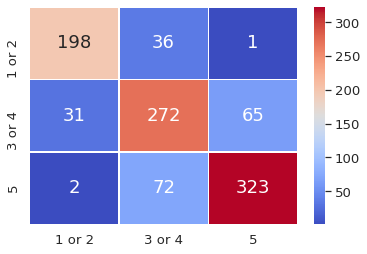

In [141]:
!nvidia-smi
torch.cuda.empty_cache()

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 3,
    output_hidden_states = False,
    output_attentions = False,
)

# Fine-tune BERT for review stars
train_BERT(model = model,
      epochs = 4,
      batch_size = 32,
      sentences = sentences,
      labels = labels_review_012,
      max_length = 250,
      training_fraction = 0.75)

# Test the fine-tuning
true_labels, pred_labels = test_BERT(
    model = model, 
    batch_size = 32,
    sentences = test_sentences,
    labels = test_labels_review_012,
    max_length = 250
)

pred_labels_names = pd.Series(pred_labels).apply(stars_label_012_inverse).values
true_labels_names = pd.Series(true_labels).apply(stars_label_012_inverse).values
cm_labels = pd.Series(np.unique(true_labels)).apply(stars_label_012_inverse).values 

categories_prediction_eval_BERT(
    y_true = true_labels_names,
    y_pred = pred_labels_names,
    labels = cm_labels
    )

#### II.B.2.d) BERT applied to the number of stars

Sun Apr 12 13:56:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    44W / 250W |  12891MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Tokenizing: 100%|██████████| 25000/25000 [00:58<00:00, 424.41it/s]



Setting up the training...

===== ===== ===== ===== ===== ===== ===== =====
Training - Epoch 1
Batch  100 of  586, Loss: 0.99, Accuracy: 0.44
Batch  200 of  586, Loss: 0.81, Accuracy: 0.62
Batch  300 of  586, Loss: 0.72, Accuracy: 0.72
Batch  400 of  586, Loss: 0.89, Accuracy: 0.59
Batch  500 of  586, Loss: 1.01, Accuracy: 0.59
----- ----- ----- ----- ----- ----- ----- -----
Average Training Loss: 0.88
Validation   -   Loss: 0.81, Accuracy: 0.65
===== ===== ===== ===== ===== ===== ===== =====
Training - Epoch 2
Batch  100 of  586, Loss: 0.79, Accuracy: 0.78
Batch  200 of  586, Loss: 0.68, Accuracy: 0.69
Batch  300 of  586, Loss: 0.61, Accuracy: 0.66
Batch  400 of  586, Loss: 0.42, Accuracy: 0.84
Batch  500 of  586, Loss: 0.66, Accuracy: 0.72
----- ----- ----- ----- ----- ----- ----- -----
Average Training Loss: 0.69
Validation   -   Loss: 0.76, Accuracy: 0.68
===== ===== ===== ===== ===== ===== ===== =====
Training - Epoch 3
Batch  100 of  586, Loss: 0.86, Accuracy: 0.69
Batch  200 of

Tokenizing:   3%|▎         | 32/1000 [00:00<00:03, 310.93it/s]

Validation   -   Loss: 0.84, Accuracy: 0.68
===== ===== ===== ===== ===== ===== ===== =====
Training complete!
Total training took 1983.66 seconds


Tokenizing: 100%|██████████| 1000/1000 [00:02<00:00, 411.01it/s]


Predicting labels for 1000 test sentences...
              precision    recall  f1-score   support

           1       0.79      0.82      0.80       133
           2       0.56      0.57      0.57       102
           3       0.59      0.54      0.56       144
           4       0.59      0.58      0.58       224
           5       0.83      0.85      0.84       397

    accuracy                           0.71      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.71      0.71      0.71      1000



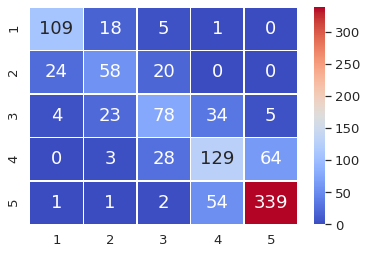

In [144]:
!nvidia-smi
torch.cuda.empty_cache()

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 5,
    output_hidden_states = False,
    output_attentions = False,
)

# Fine-tuning BERT for review stars
train_BERT(model = model,
      epochs = 4,
      batch_size = 32,
      sentences = sentences,
      labels = labels_review_stars,
      max_length = 250,
      training_fraction = 0.75)

# Test the fine-tuning
true_labels, pred_labels = test_BERT(
    model = model, 
    batch_size = 32,
    sentences = test_sentences,
    labels = test_labels_review_stars,
    max_length = 250
)

pred_labels_names = pd.Series(pred_labels).apply(lambda x : x + 1).values
true_labels_names = pd.Series(true_labels).apply(lambda x : x + 1).values
cm_labels = pd.Series(np.unique(true_labels)).apply(lambda x : x + 1).values 

categories_prediction_eval_BERT(
    y_true = true_labels_names,
    y_pred = pred_labels_names,
    labels = cm_labels
    )

#### II.B.2.e) BERT applied to restaurant types

Sun Apr 12 14:31:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    51W / 250W |  12891MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Tokenizing: 100%|██████████| 25000/25000 [00:58<00:00, 427.41it/s]



Setting up the training...

===== ===== ===== ===== ===== ===== ===== =====
Training - Epoch 1
Batch  100 of  586, Loss: 0.62, Accuracy: 0.78
Batch  200 of  586, Loss: 0.68, Accuracy: 0.78
Batch  300 of  586, Loss: 0.53, Accuracy: 0.78
Batch  400 of  586, Loss: 0.72, Accuracy: 0.78
Batch  500 of  586, Loss: 0.39, Accuracy: 0.91
----- ----- ----- ----- ----- ----- ----- -----
Average Training Loss: 0.62
Validation   -   Loss: 0.51, Accuracy: 0.81
===== ===== ===== ===== ===== ===== ===== =====
Training - Epoch 2
Batch  100 of  586, Loss: 0.12, Accuracy: 0.97
Batch  200 of  586, Loss: 0.47, Accuracy: 0.91
Batch  300 of  586, Loss: 0.50, Accuracy: 0.84
Batch  400 of  586, Loss: 0.38, Accuracy: 0.91
Batch  500 of  586, Loss: 0.31, Accuracy: 0.81
----- ----- ----- ----- ----- ----- ----- -----
Average Training Loss: 0.42
Validation   -   Loss: 0.49, Accuracy: 0.83
===== ===== ===== ===== ===== ===== ===== =====
Training - Epoch 3
Batch  100 of  586, Loss: 0.21, Accuracy: 0.91
Batch  200 of

Tokenizing:   3%|▎         | 33/1000 [00:00<00:02, 329.38it/s]

Validation   -   Loss: 0.55, Accuracy: 0.82
===== ===== ===== ===== ===== ===== ===== =====
Training complete!
Total training took 1983.62 seconds


Tokenizing: 100%|██████████| 1000/1000 [00:02<00:00, 404.56it/s]


Predicting labels for 1000 test sentences...
                        precision    recall  f1-score   support

American (Traditional)       0.83      0.85      0.84       439
               Chinese       0.86      0.90      0.88       103
               Italian       0.82      0.78      0.80       207
               Mexican       0.87      0.83      0.85       251

              accuracy                           0.84      1000
             macro avg       0.84      0.84      0.84      1000
          weighted avg       0.84      0.84      0.84      1000



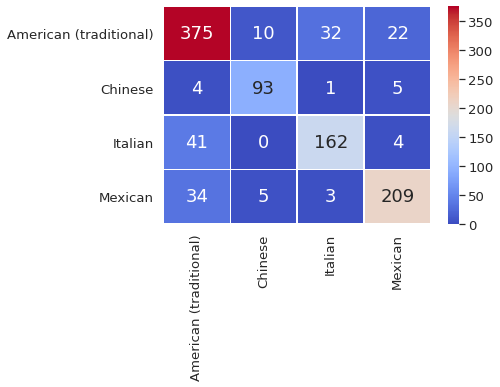

In [145]:
!nvidia-smi
torch.cuda.empty_cache()

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 4,
    output_hidden_states = False,
    output_attentions = False,
)

# Fine-tuning BERT for restaurant type (4 labels)
train_BERT(model = model,
      epochs = 4,
      batch_size = 32,
      sentences = sentences,
      labels = labels_restype,
      max_length = 250,
      training_fraction = 0.75)

# Test the fine-tuning
true_labels, pred_labels = test_BERT(
    model = model, 
    batch_size = 32,
    sentences = test_sentences,
    labels = test_labels_restype,
    max_length = 250
)

pred_labels_names = pd.Series(pred_labels).apply(categories_label_0123_inverse).values
true_labels_names = pd.Series(true_labels).apply(categories_label_0123_inverse).values
cm_labels = pd.Series(np.unique(true_labels)).apply(categories_label_0123_inverse).values 

categories_prediction_eval_BERT(
    y_true = true_labels_names,
    y_pred = pred_labels_names,
    labels = ['American (traditional)','Chinese','Italian','Mexican']
    )

#### II.B.2.f) BERT applied to area characteristics

Sun Apr 12 15:05:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    51W / 250W |  12891MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Tokenizing: 100%|██████████| 25000/25000 [01:00<00:00, 412.38it/s]



Setting up the training...

===== ===== ===== ===== ===== ===== ===== =====
Training - Epoch 1
Batch  100 of  586, Loss: 0.76, Accuracy: 0.62
Batch  200 of  586, Loss: 0.75, Accuracy: 0.69
Batch  300 of  586, Loss: 0.96, Accuracy: 0.44
Batch  400 of  586, Loss: 0.82, Accuracy: 0.59
Batch  500 of  586, Loss: 0.97, Accuracy: 0.38
----- ----- ----- ----- ----- ----- ----- -----
Average Training Loss: 0.87
Validation   -   Loss: 0.84, Accuracy: 0.61
===== ===== ===== ===== ===== ===== ===== =====
Training - Epoch 2
Batch  100 of  586, Loss: 0.66, Accuracy: 0.72
Batch  200 of  586, Loss: 0.87, Accuracy: 0.56
Batch  300 of  586, Loss: 0.87, Accuracy: 0.62
Batch  400 of  586, Loss: 0.82, Accuracy: 0.53
Batch  500 of  586, Loss: 0.84, Accuracy: 0.59
----- ----- ----- ----- ----- ----- ----- -----
Average Training Loss: 0.79
Validation   -   Loss: 0.85, Accuracy: 0.59
===== ===== ===== ===== ===== ===== ===== =====
Training - Epoch 3
Batch  100 of  586, Loss: 0.76, Accuracy: 0.72
Batch  200 of

Tokenizing:   3%|▎         | 34/1000 [00:00<00:02, 338.83it/s]

Validation   -   Loss: 0.99, Accuracy: 0.58
===== ===== ===== ===== ===== ===== ===== =====
Training complete!
Total training took 1982.73 seconds


Tokenizing: 100%|██████████| 1000/1000 [00:02<00:00, 409.69it/s]


Predicting labels for 1000 test sentences...
              precision    recall  f1-score   support

     average       0.47      0.52      0.49       306
        poor       0.72      0.75      0.74       602
        rich       0.26      0.08      0.12        92

    accuracy                           0.62      1000
   macro avg       0.48      0.45      0.45      1000
weighted avg       0.60      0.62      0.60      1000



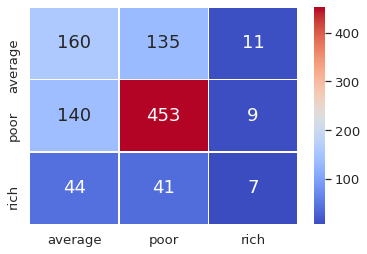

In [146]:
!nvidia-smi
torch.cuda.empty_cache()

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 3,
    output_hidden_states = False,
    output_attentions = False,
)

# Fine-tuning BERT for social characteristics of area (3 labels)
train_BERT(model = model,
      epochs = 4,
      batch_size = 32,
      sentences = sentences,
      labels = labels_area,
      max_length = 250,
      training_fraction = 0.75)

# Test the fine-tuning
true_labels, pred_labels = test_BERT(
    model = model, 
    batch_size = 32,
    sentences = test_sentences,
    labels = test_labels_area,
    max_length = 250
)

pred_labels_names = pd.Series(pred_labels).apply(area_label_012_inverse).values
true_labels_names = pd.Series(true_labels).apply(area_label_012_inverse).values
cm_labels = pd.Series(np.unique(true_labels)).apply(area_label_012_inverse).values 

categories_prediction_eval_BERT(
    y_true = true_labels_names,
    y_pred = pred_labels_names,
    labels = ['average','poor','rich']
    )

# III) Tip generation

## III.A) Preparation

Importing and installing required packages

In [147]:
!pip install transformers

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import transformers
import textwrap

Importing the dataset

In [0]:
df = pd.read_pickle('/content/yelp_data_09042020.pkl')

## II.B) Language generation with transformers

### III.B.1) Preparation

Preparing the dataset : here we will use a specific combination of characteristics (categories = Italian, rating = excellent and social=rich) to look at and compare different language genrators.

In [0]:
data_expl=df[df['categories']=='Italian']
data_expl=data_expl[data_expl['rating']=='excellent']
data_expl=data_expl[data_expl['social']=='rich']

Cleaning the dataset and shortening the sentences.

In [0]:
X = [''.join(x) for x in data_expl.loc[:,'text']]
to_replace=['\n','\'','"','”','“','′','‘','<','>']
for character in to_replace:
  X = [x.replace(character, '') for x in X]
X = [textwrap.shorten(x, width=250,placeholder="") for x in X]

Lets's have a look at the sentences : most of them clearly recall "excellent" Italian restaurants.

In [152]:
for i in range(5):
  print(i,' ',X[i])

0   This place epitomizes the rumored transformation that is in the process of taking place in Pittsburgh. Great food, drinks, and service, but the atmosphere is second to none. Definitely a must visit for locals and visitors alike! You will not feel
1   Great gluten free options for pizza and wings. The white pizza is amazing
2   Since its a short walk from the office I dine here several times a month. I really like this family operated restaurant. Whether its there Monday/Tuesday pizza special for 2 or Pasta Rustica, they deliver big on flavor.
3   Ive wanted to try Sienna for a long time, as Ive always heard great things. I finally got to after working a show at the convention center recently. I wasnt entirely sure of what the format of the place was until I went. The first floor is a more
4   Great new restaurant on Penn Ave thats reasonably priced. At first I thought this would be an upscale restaurant based on the name but I think they did that on purpose. Its a comfortable resta

Importing transformers : here we will use *gpt2* pretrained weights, *GPT2Tokenizer* tokenizer and *TFGPT2LMHeadModel* model to generate the text (with different types of generation). These are the tools recommended by Transformers documentation for language generation.

In [153]:
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

We are going two different methods for or auto-regressive (causal) language generation, where the probabilty of appending a new word at the end of a text is given by the product of conditional next word distributions in the past of the sentence.

### III.B.2) A deterministic method : exploring beam search

The most basic causal method would be to use a deterministic greedy algorithm which would simply generate each word taking the most likely given the past words, i.e. find $w_t​=argmax ​P(w∣w_{1:t−1​})$ on the pretrained weights at each step $t$. 
Here we use a method a bit more complex : at each step, a number  *num_beams* of different possible next paths (beams) including multiple words are compared. 

In [154]:
list_beam_sentences=[]

for k in range(5):
  tokenized_review=tokenizer.encode(X[k], return_tensors='tf')
  beam_output = model.generate(tokenized_review, max_length=100, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)
  a=format(tokenizer.decode(beam_output[0], skip_special_tokens=True))
  list_beam_sentences.append(a)
  print(k,' ',a)
  print()

0   This place epitomizes the rumored transformation that is in the process of taking place in Pittsburgh. Great food, drinks, and service, but the atmosphere is second to none. Definitely a must visit for locals and visitors alike! You will not feel like you are walking down the street.

I've been coming here for a few years now and I've never had a bad experience. The food is good, the service is great and the staff is very friendly. I would highly recommend this place

1   Great gluten free options for pizza and wings. The white pizza is amazing.

This is a great place to get a slice of pizza for dinner. I've been here a few times and it's always great. It's a little pricey, but if you're looking for a good pizza place, this is the place for you. If you don't want to spend a lot of money, I highly recommend this place.

2   Since its a short walk from the office I dine here several times a month. I really like this family operated restaurant. Whether its there Monday/Tuesday pizza s

We observe that, with this method, most of the sentences generated seem coherent and grammatically correct. However they tend to converge quickly with the same kind of text. (two *I've been coming here* and two *This is a great place* for example) 
This can be explained by the fact, starting with similar reviews (positive reviews about Italian restaurants), the next words most likely are somewhat always quite the same.
In this end, this method may not be the most appropriate to generate a diverse set of tips.

### III.B.3) A stochastic method : exploring top-k sampling

This time, we use a probabilistic method : we do not chose to continue a sentence with the most likely result according to the the pretrained weights. Instead, we draw randomly the next words according to the probability distribution given by these pretrained weights.
In Top-K sampling, the k most likely next words are filtered and the probability mass is redistributed among only those k next words.
Therefore, we get a more various set of possible outcomes as we are increasing k. However, if k is too big, the sentences we generated may not be coherent with the previous context.

In [155]:
tf.random.set_seed(0)

list_topk_sentences=[]

for k in range(5):
  tokenized_review=tokenizer.encode(X[k], return_tensors='tf')
  topk_output = model.generate(tokenized_review, do_sample=True, max_length=100, top_k=40)
  b=tokenizer.decode(topk_output[0], skip_special_tokens=True)
  list_topk_sentences.append(b)
  print(k,' ',b)
  print()

0   This place epitomizes the rumored transformation that is in the process of taking place in Pittsburgh. Great food, drinks, and service, but the atmosphere is second to none. Definitely a must visit for locals and visitors alike! You will not feel at home at the restaurants, but will feel at home here.

The location does not disappoint, but a few things are starting to creep in. For the first time there is a full bar area where customers can choose up to three different cocktails to

1   Great gluten free options for pizza and wings. The white pizza is amazing. The white sauce is great too!

I enjoyed this as a birthday gift and I'm sure one day a month we'll all be making an excuse for lunch outside and getting dinner here.

Was extremely pleased with my experience ordering this place again for dinner I will not go back here. I was a little surprised on how much nicer it had to be (this isn't too expensive) but we were not able

2   Since its a short walk from the office I dine her

We observe that the texts generated are much more diverse.

In [156]:
list_topk_sentences

['This place epitomizes the rumored transformation that is in the process of taking place in Pittsburgh. Great food, drinks, and service, but the atmosphere is second to none. Definitely a must visit for locals and visitors alike! You will not feel at home at the restaurants, but will feel at home here.\n\nThe location does not disappoint, but a few things are starting to creep in. For the first time there is a full bar area where customers can choose up to three different cocktails to',
 "Great gluten free options for pizza and wings. The white pizza is amazing. The white sauce is great too!\n\nI enjoyed this as a birthday gift and I'm sure one day a month we'll all be making an excuse for lunch outside and getting dinner here.\n\nWas extremely pleased with my experience ordering this place again for dinner I will not go back here. I was a little surprised on how much nicer it had to be (this isn't too expensive) but we were not able",
 'Since its a short walk from the office I dine h

### III.B.4) Computing a similarity score to compare both methods : BERT score

As indicated by our project teacher, BERT score (which uses a pretrained BERT corpus) is a similarity score function which compares sentences generated to reference setences. Here, we are going to compare the part of texts we generated with both methods (the tips) to the reference sentences (the reviews).

However, for us, lower BERT scores are not a problem *per se* since we do not necessary want the tips to be exactly about the same subject as the original corpus. (That's also why we introduced randomness in the text generation.)

In [157]:
!pip install bert-score

     |████████████████████████████████| 61kB 1.8MB/s 


In [0]:
import logging
import transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["xtick.major.size"] = 0
rcParams["xtick.minor.size"] = 0
rcParams["ytick.major.size"] = 0
rcParams["ytick.minor.size"] = 0

rcParams["axes.labelsize"] = "large"
rcParams["axes.axisbelow"] = True
rcParams["axes.grid"] = True

In [0]:
from bert_score import score

Generating the reference set (the reviews) and the candidate sets (the tips). We strip the review texts from the outputs we generated to keep only the generated parts.

In [0]:
references=X[0:5]
beam_tips=[]
topk_tips=[]

for k in range(5):
  beam_tips.append(list_beam_sentences[k].strip(X[k]))
  topk_tips.append(list_topk_sentences[k].strip(X[k]))

beam_tips = [x.replace('\n', '') for x in beam_tips]
topk_tips = [x.replace('\n', '') for x in topk_tips]

For each couple of sentences in both corpuses, BERT score function calculates precision, recall, and F1.

In [162]:
P_beam, R_beam, F1_beam = score(beam_tips, references, lang='en', verbose=True, rescale_with_baseline=True)
P_topk, R_topk, F1_topk = score(topk_tips, references, lang='en', verbose=True, rescale_with_baseline=True)


calculating scores...
computing bert embedding.



computing greedy matching.



done in 0.54 seconds, 9.20 sentences/sec
calculating scores...
computing bert embedding.



computing greedy matching.



done in 0.17 seconds, 30.24 sentences/sec


We can have a look at the distribution of F1 scores for example. But, once again, our objective is not to generate identical sentences.

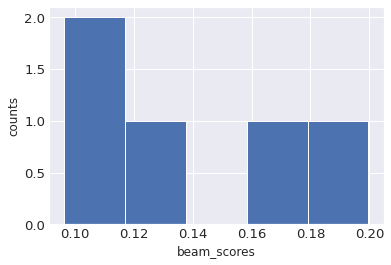

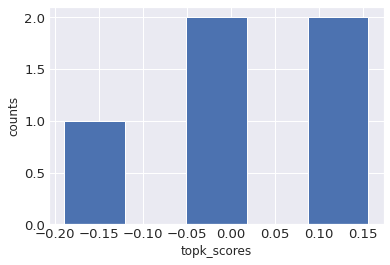

In [163]:
import matplotlib.pyplot as plt

plt.hist(F1_beam, bins=5)
plt.xlabel("beam_scores")
plt.ylabel("counts")
plt.show()

plt.hist(F1_topk, bins=5)
plt.xlabel("topk_scores")
plt.ylabel("counts")
plt.show()

Similarity scores compared to the review for the "beam" corpus seem to be a bit higher than for the "topk" corpus.
However we should generate a much larger tip corpus (which takes time!) to have a more definite answer.

Another thing we can do is comparing the tips between them within a given corpus. Let's compare 0 and 1 vs. 2 and 3 for each generator.
(this part is commented with # due to RAM limitations when running the whole project)

In [0]:
#references_beam=beam_tips[0:2]
#candidates_beam=beam_tips[2:4]
#references_topk=topk_tips[0:2]
#candidates_topk=topk_tips[2:4]

In [0]:
#P_beam_within, R_beam_within, F1_beam_within = score(candidates_beam, references_beam, lang='en', verbose=True, rescale_with_baseline=True)
#P_topk_within, R_topk_within, F1_topk_within = score(candidates_topk, references_topk, lang='en', verbose=True, rescale_with_baseline=True)

In [0]:
#print(F1_beam_within.mean())
#print(F1_topk_within.mean())

With the cell just above, we find a value of 0.3794 for beam tips and -0.0121 for Top K tips. We can see that there is much more similarity within the tips for the beam generator. This is very coherent with our observations above.
Therefore, we could use BERT score to select the generator which creates the most diverse corpus, provided that sentence are coherent (=generator with the lowest BERT score). Of course, we would still need a much bigger tips corpus to make it relevant.

## III.C) Generating a corpus of conditional tips with transformers

In [0]:
tf.random.set_seed(0)

In [0]:
df=df.sample(frac=1,random_state=2)

The function below generate tips roaming through the reviews database (one tip per review); more exactly it generates *m* times $4\times 3\times 3 = 36$ reviews (one for each category combination).

In [0]:
def generate_tips_corpus(dataframe,m):
  from IPython.display import clear_output 
  A=[0, 0, 0, 0, 0]
  n=0
  to_replace=[',','\'','"','”','“','′','‘','<','>','(',')','!','?','.','..','...','....','-']

  # We iterate on all the categories combinations to generate messanges
  for u in dataframe['categories'].unique() :
    for v in dataframe['rating'].unique() :
      for w in dataframe['social'].unique() :
        df_condition=dataframe[dataframe['categories']==u]
        df_condition=df_condition[df_condition['rating']==v]
        df_condition=df_condition[df_condition['social']==w]
        X = [''.join(x) for x in df_condition.loc[:,'text']]
        to_replace=['\n','\'','"','”','“','′','‘','<','>']
        for character in to_replace:
          X = [x.replace(character, '') for x in X]
        X = [textwrap.shorten(x, width=250,placeholder="") for x in X]

        # We try to find m messages for each combination of characteristics
        for k in range(m) :
            tokenized_review=tokenizer.encode(X[k], return_tensors='tf')
            topk_output = model.generate(tokenized_review, do_sample=True, min_length=100, max_length=120, top_k=40)
            #Here we get rid of the original part with strip(X[k])
            tip=tokenizer.decode(topk_output[0], skip_special_tokens=True).strip(X[k])
            # Cleaning the tips
            tip=tip.replace('\n', ' ')
            tip=tip.lstrip()
            for punct in to_replace:
              tip=tip.lstrip(punct)
            tip=tip.lstrip()
            n=n+1
            # We get rid of part of sentences at the beginning and at the end of the tip. 
            # The three conditions mean that in the end we do not keep the tips for which no complete sentence has been generated.
            if tip.find('.')!=-1:
              tip=tip[tip.find('.'):]
              if tip.rfind('.')!=-1:
                tip=tip[:tip.rfind('.')]
                tip=tip.lstrip()
                if tip !='.':
                  tip=tip.lstrip('.')
                  tip=tip.lstrip()
                  tip=tip+'.'
                  A=np.vstack((A,[X[k],tip,u,v,w]))
            clear_output(wait=True)
            print('Progess',100*n/(m*36),'%')

  A = np.delete(A,(0),axis=0)
  tips_corpus=pd.DataFrame(data=A, columns=["original_text","tip","categories","rating","social"])
  return(tips_corpus)

In [170]:
df_tips=generate_tips_corpus(df,15)

Progess 100.0 %


Cleaning from empty tips

In [0]:
df_tips['tip']=df_tips['tip'].astype(str)
df_tips=df_tips[df_tips['tip'] != '.']
df_tips=df_tips.reset_index()
df_tips=df_tips.drop(['index'],axis=1)

Saving the tips database

In [0]:
save_url = '/content/yelp_tips_generated_11042020.pkl'
df_tips.to_pickle(save_url)

## I.D) Evaluating the lexical, grammatical and syntaxic quality of text generation

In [0]:
df_tips=pd.read_pickle('/content/yelp_tips_generated_11042020.pkl')

In [174]:
df_tips.head()

,original_text,tip,categories,rating,social
0,Ohhhhh Carlitos!! Youve come a long way since ...,"The meat is great, and the potatoes are good t...",Mexican,excellent,poor
1,"Really good Nachos! We stopped in for a snack,...",My wife loves them. Her favorite is the banana...,Mexican,excellent,poor
2,CMon... Its Carolinas! I does not get any bett...,"And the rest is from the usual suspects: Brie,...",Mexican,excellent,poor
3,Shame on me for not visiting the San Diego loc...,The only downside is that we had to try every ...,Mexican,excellent,poor
4,The Tamale Store sets up a booth at the Farmer...,We got in the booth just prior to the first ti...,Mexican,excellent,poor


### III.D.1) Subjective judgments by human evaluators

We may just print the whole list of tips, and see which deliver a coherent sentence (in terms of syntax, grammar and vocabulary) and which do not.

In [175]:
for i in range(len(df_tips.index)):
  print(df_tips.loc[i,'tip'])

The meat is great, and the potatoes are good too, so I'm all for it. The cheese is great, I have not tried many cheeses on this site.
My wife loves them. Her favorite is the banana, but they were too much coconut and too sweet! I will be back!!!!  My wife was so pleased with the coconut oil and banana Nachos. When we ordered from the store we said they were awesome.
And the rest is from the usual suspects: Brie, The L.A. Times, and Gossip. I'm not even sure what they're saying about their tacos. It sounds like a good meal, just not in this town.
The only downside is that we had to try every taco we could on a day. The food is a little bland, but we all enjoyed it and we also didn't get cold drinks. On top of that, we were seated at 11 for the meal.
We got in the booth just prior to the first time we bought any of the Tamale Store products - it was so hot.
co/L5VJKqKb4Fo pic.twitter.
Sauce is great. I ordered the tacos for breakfast. The prices are just right for what I ordered. The bea

According to our personnal counts, almost all the tips above are syntaxically and grammatically correct.
A majority (70%) make sense when speaking about a restaurant.

### III.D.2) Computing a similarity score for model tuning

A possibility to use BERT score after having chosen a type of model way would be to generate a lot of tips with the same review (for example for different values of the 'topk' parameter), then pick the tip with the highest BERT score with regard to the review (since it probably best respects its initial characteristics). However, this would require a lot of calculations for one tip...

### III.D.3) Evaluating closeness to conditional variables

We can evaluate the quality of our tips using the predictors we built in part II, and see if they reflect correctly the labels of the reviews from which they were made.
Here, we will use the single multilabel svm predidctor from II.A.4i).

Cleaning and vectorizing tips and labels

In [0]:
df_tips.loc[:,'tip'].replace('[!"#%\'()$*+,-./:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]',' ',inplace=True,regex=True)
X_tips = [''.join(x) for x in df_tips.loc[:,'tip']]
X_tips = [x.lower() for x in X_tips]
X_tips = [x.replace('\n', '') for x in X_tips]
X_tips_cv = cv_no_stopwords.transform(X_tips)
y_tips=df_tips.drop(['original_text','tip'],axis=1)
y_tips=y_tips.to_numpy()
y_tips_mb = mb_trained.transform(y_tips)

Prediction and binary confusion matrices for each of the $4+3+3=10$ labels. Of course, since our sample is very small, the results are not very representative. (And in a "natural" environment, all the tips are not compelled to be specific of the contexts in which they were generated anyway.)

Binary confusion matrix for American (Traditional)


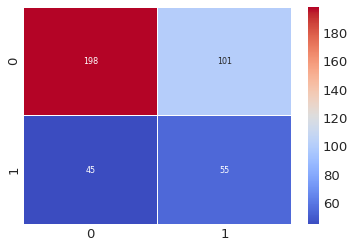

Accuracy : 0.6340852130325815
Precision : 0.3525641025641026
Recall : 0.55
F1-score 0.4296875
Binary confusion matrix for Chinese


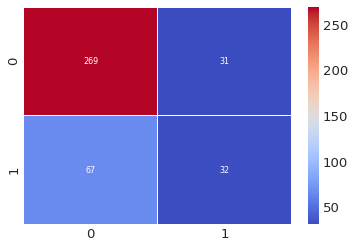

Accuracy : 0.7543859649122807
Precision : 0.5079365079365079
Recall : 0.32323232323232326
F1-score 0.3950617283950617
Binary confusion matrix for Italian


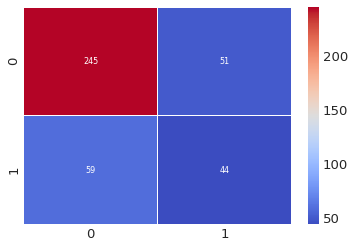

Accuracy : 0.7243107769423559
Precision : 0.4631578947368421
Recall : 0.42718446601941745
F1-score 0.4444444444444445
Binary confusion matrix for Mexican


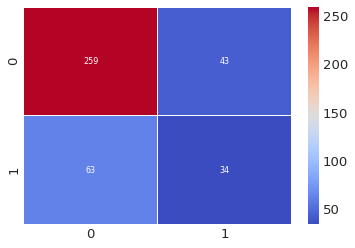

Accuracy : 0.7343358395989975
Precision : 0.44155844155844154
Recall : 0.35051546391752575
F1-score 0.3908045977011494
Binary confusion matrix for bad


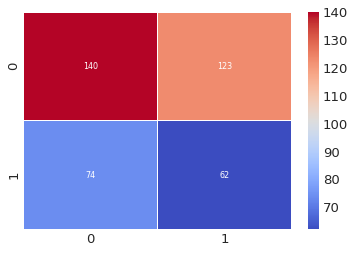

Accuracy : 0.506265664160401
Precision : 0.33513513513513515
Recall : 0.45588235294117646
F1-score 0.3862928348909657
Binary confusion matrix for excellent


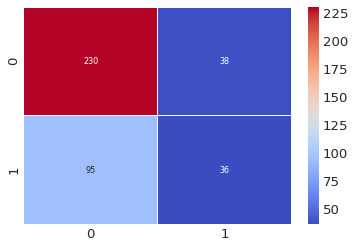

Accuracy : 0.6666666666666666
Precision : 0.4864864864864865
Recall : 0.2748091603053435
F1-score 0.351219512195122
Binary confusion matrix for good


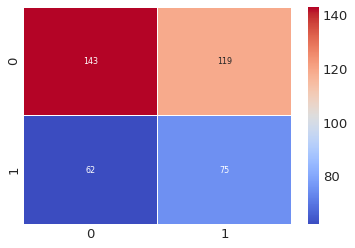

Accuracy : 0.5463659147869674
Precision : 0.3865979381443299
Recall : 0.5474452554744526
F1-score 0.4531722054380664
Binary confusion matrix for average


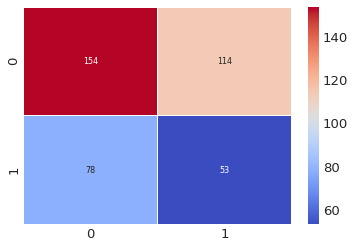

Accuracy : 0.518796992481203
Precision : 0.31736526946107785
Recall : 0.40458015267175573
F1-score 0.35570469798657717
Binary confusion matrix for poor


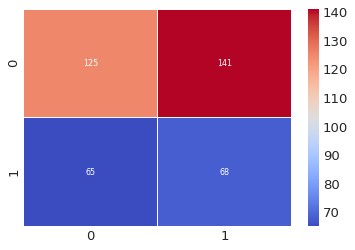

Accuracy : 0.48370927318295737
Precision : 0.3253588516746411
Recall : 0.5112781954887218
F1-score 0.3976608187134503
Binary confusion matrix for rich


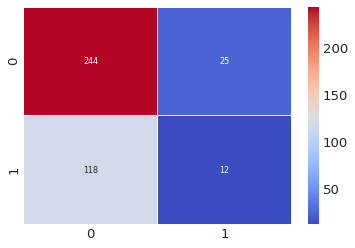

Accuracy : 0.6416040100250626
Precision : 0.32432432432432434
Recall : 0.09230769230769231
F1-score 0.1437125748502994


In [177]:
y_pred_svm = clf_svm_multilabel.predict(X_tips_cv)
joint_prediction_eval(y_tips_mb, y_pred_svm)